#  1.0 INTRODUCTION

In recent years, the field of medical sciences has witnessed a transformative impact through the integration of advanced machine learning models, particularly in the detection and diagnosis of various diseases. This technological advancement holds significant promise for conditions such as dementia, diabetes, and different forms of cancer, offering new avenues for early detection and improved patient outcomes. 

One notable contribution to this revolutionary intersection of machine learning and medicine is the utilization of algorithms in the diagnosis and prognosis of cancer. Among the datasets playing a crucial role in this domain is the Wisconsin Breast Cancer dataset.This dataset, presented in a modified version named MS4S16_Dataset.csv, is a comprehensive compilation of information pertaining to the nuclei of cells extracted from breast cancer tumors. The dataset comprises thirty-two columns, with the target variable, 'diagnosis,' indicating whether the tumor is malignant (M) or benign (B). Each sample is uniquely identified by the 'id' column, while the remaining thirty columns represent features associated with specific physical attributes of the cell nuclei observed in medical images. 

The ten unique measurements in the dataset encompass critical characteristics such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. For each measurement, the dataset provides the mean, standard error, and 'worst' values, where 'worst' represents the average of the three largest values in each observation.

# 2.0METHODOLOGY


Firstly, check for all missing values in each column. Next, drop rows where values are null and negative.And also dropped Id column and texture_mean column from the dataframe.Check for duplicated rows and remove them.And Utilize a box plot to identify outliers. Subsequently, use the IQR method to remove outliers.

Secondly,convert categorical data into numerical format using Label encoding method.Next,explored the relationships between variables using correlation analysis.Created a correlation matrix for a DataFrame (new_df1) and identified highly correlated features with a threshold of 0.8. The code selects one feature from each highly correlated pair.The features to be dropped are stored in the to_drop list.Then created additional code iterates through the highly correlated features and their correlations, creating a list of dictionaries (correlation_pairs_list). Each dictionary in the list contains information about the pair of correlated features and their correlation value.Finally, a DataFrame (correlation_pairs) is created from the list of dictionaries, and it is displayed. This DataFrame provides a clear overview of the correlated feature pairs along with their correlation values.Using correlation features,manually selected two list of features to drop (to_drop_manual_list).

Employed an appropriate feature scaling method to standardize the variables for three selected datasets. After splitting each dataset into independent (x) and dependent (y) datasets, where x contains all the features (excluding the 'id' and 'texture_mean' columns) and y contains the target variable ('diagnosis'). These datasets were then utilized for clustering, and the best dataset was chosen based on the higher silhouette score.Subsequently, dimensionality reduction (PCA) was employed to assess whether it improves clustering or if a smaller number of features enhances the results. The utility of different algorithms (k-means clustering and hierarchical clustering) was then evaluated using appropriate metrics.

Finally, a supervised machine learning analysis was conducted, utilizing features and attributes derived from pre-processing, exploratory data analysis (EDA), and unsupervised work. Various classification algorithms were employed to distinguish observations as benign (Diagnosis=B) or malignant (Diagnosis=M). Additionally, regression models were created to predict numerical features.


# 3.0 PART 1

## 3.1 EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df=pd.read_csv('')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape


(571, 32)

##### Data Information:
The DataFrame contains 571 entries and 32 columns. Missing values are indicated by the "Non-Null Count" for each column. The "id" column has 3 missing values, "perimeter_mean" has 4 missing values, and so on. The "diagnosis" column has the object data type for categorical variables, while others have float64 data type for numerical values.

### 3.1.1 Summary Statistics

In [5]:
#drop the id column
df.drop('id',axis=1,inplace=True)

In [6]:
df.describe(include='object')

,diagnosis
count,568
unique,2
top,B
freq,356


There are 568 observation in the dataset.The variable "diagnosis" has two unique values.The most frequent value in the "diagnosis" variable is Benign(B).It appears 356 times in the dataset.Mean, standard deviation, minimum, and maximum values provide an overview of the distribution. The columns "texture_mean," "concave points_mean," and "fractal_dimension_mean" contain negative values and an extremely low value (-999.00000). The 25th, 50th (median), and 75th percentiles offer insights into the data spread. The ranges and scales of the features vary, which is important to consider when interpreting correlations or performing certain machine learning algorithms sensitive to feature scales.


### 3.1.2 Handling missing values

In [8]:
# check for other missing value propotions
(df.isnull().sum() / len(df)).sort_values(ascending=False)

texture_worst              0.036778
fractal_dimension_worst    0.022767
radius_worst               0.022767
smoothness_worst           0.015762
concave points_se          0.015762
concave points_mean        0.014011
symmetry_se                0.014011
concavity_se               0.014011
texture_se                 0.014011
fractal_dimension_se       0.012259
compactness_se             0.012259
area_se                    0.010508
concave points_worst       0.010508
perimeter_worst            0.010508
smoothness_se              0.010508
radius_se                  0.010508
texture_mean               0.010508
radius_mean                0.008757
area_mean                  0.008757
fractal_dimension_mean     0.007005
concavity_mean             0.007005
compactness_mean           0.007005
area_worst                 0.007005
perimeter_mean             0.007005
compactness_worst          0.007005
symmetry_worst             0.007005
perimeter_se               0.005254
symmetry_mean              0

This used to calculated the proportions of missing values for each column.Columns such as texture_worst, fractal_dimension_worst, radius_worst, etc., have missing values, and the proportions range from approximately 3.68% to 0.005.3%. 'texture_worst' has the highest proportion of missing values at 3.68%.Target column 'diagnosis' column also has a small proportion of missing values.

In [9]:
#checked number of missing values for each column
df.isnull().sum()

diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64

This shows that the number of missing values.texture_worst has highest number of missing values about 21.

In [10]:
#drop rows where values are null
df1=df.dropna()

df1.shape

(482, 31)

In [11]:
df1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df1.diagnosis.value_counts()

diagnosis
B    303
M    179
Name: count, dtype: int64

Initially, there were 200 missing values, but after cleaning, there are no remaining missing values, resulting in a count of zero. The shape becomes 482 rows and 31 columns.B instances have 303 and 179 for M.

### 3.1.3 checked negative values

In [13]:
negative_count = df1.drop(['diagnosis'],axis=1).lt(0).sum()
negative_count.loc[negative_count>0]

texture_mean              125
concave points_mean         1
fractal_dimension_mean      7
dtype: int64

In [14]:
df1=df1.copy()
df1.drop('texture_mean',axis=1,inplace=True)

In [15]:
# Extract the 'diagnosis' column and keep it as it is
diagnosis_column = df1['diagnosis']

# Keep rows where all values in numeric columns are non-negative
df1 = df1[df1.drop('diagnosis', axis=1).ge(0).all(axis=1)]

# Combine 'diagnosis' column with the DataFrame
df1["diagnosis"] = diagnosis_column

# Reset index
df1 = df1.reset_index(drop=True)


In [16]:
negative_count = df1.drop(['diagnosis'],axis=1).lt(0).sum()
negative_count.loc[negative_count>0]

Series([], dtype: int64)

In [17]:
df1.shape

(474, 30)

In [19]:
df1.diagnosis.value_counts()

diagnosis
B    297
M    177
Name: count, dtype: int64

After checking negative values, 133 negative values were identified. There were 125 negative values in the "texture_mean" column, 1 in the "concave points_mean" column, and 7 in the "fractal_dimension_mean" column. After removing negative values, the DataFrame's shape becomes 474 rows and 30 columns.B instances have 297 and 177 for M.

### 3.1.4 Checked string values except diagnosis column

In [20]:
string_count=df1.drop(['diagnosis'], axis=1).applymap(lambda x: isinstance(x, str)).sum()
string_count[string_count>0]

Series([], dtype: int64)

This code used to identify the string values.Output shows that there are no string values.

### 3.1.5 Duplicates

In [21]:
#number of duplicated
df1.duplicated().sum()

2

In [22]:
df1.loc[df1.duplicated(keep=False), :]

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
408,M,18.01,118.40,1007.0,0.10010,0.12890,0.117,0.07762,0.2116,0.06077,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.2544,0.1489,0.3251,0.07625
409,M,18.01,118.40,1007.0,0.10010,0.12890,0.117,0.07762,0.2116,0.06077,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.2544,0.1489,0.3251,0.07625
472,B,7.76,47.92,181.0,0.05263,0.04362,0.000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
473,B,7.76,47.92,181.0,0.05263,0.04362,0.000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [23]:
#Remove duplicates
df1.drop_duplicates(keep='last',inplace=True)

In [24]:
df1.duplicated().sum()

0

In [25]:
df1.shape

(472, 30)

Upon further investigation, two duplicate rows were identified. Following the removal of these duplicates, the count of duplicate rows is now zero. The shape becomes 472 entries and 30 columns.

### 3.1.6 Outliers

The Box Plot analysis revealed the presence of outliers.Above code visualizes the status summary as a box plot divided into M and B categories by iterating through the dataset's numerical columns.It facilitates determining the visual distribution of the numerical relationship to the diagnosis.Additionally, this displays the dataset's statistical distribution's outliers.

In [ ]:
#Visualizing outliers using Box Plot
for column in df1.columns:
    if column !='diagnosis':
        sns.boxplot(x='diagnosis',y=df1[column],data=df1)
        plt.show()

### 3.1.6.1 Removing outliers using IQR method

In [ ]:
#All data do not follow normal distribution.So used IQR method
for column in df1.columns:
	if column !='diagnosis':
		
	#Calculate the upper and lower limits
		Q1=df1[column].quantile(0.25)
		Q3=df1[column].quantile(0.75)
		IQR=Q3-Q1
		lower=Q1-1.5*IQR
		upper=Q3+1.5*IQR

	#Check and print rows with outliers
		outliers=df1[(df1[column]<lower)|(df1[column]>upper)]
		print("outliers in",column,":",outliers)


	#Removing the outliers
		new_df=df1[(df1[column]>lower)&(df1[column]<upper)]
        
		print("Old dataframe shape ",df1.shape)
		print("New dataframe shape ",new_df.shape)

In [28]:
new_df.reset_index(drop=True,inplace=True)

In [ ]:
#After removing outliers visualizing the data using Box Plot
for column in new_df.columns:
    if column !='diagnosis':
        sns.boxplot(x='diagnosis',y=new_df[column],data=new_df)
        plt.show()

In [30]:
print("Old dataframe shape ",df1.shape)
print("New dataframe shape ",new_df.shape)

Old dataframe shape  (472, 30)
New dataframe shape  (453, 30)


Using IQR method, attempted to identify and remove outliers from a DataFrame.After removing outliers, there are 453 rows and 30 columns.

### 3.1.7 Data Visualization

In [ ]:
# distribution of each feature, Univariate analysis
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
new_df.hist(ax=ax, color = "skyblue")
plt.show()

Figure 1:Distribution of each feature

Univariate analysis  used to describe and analyze individual variables in a dataset. These shows that some variables have right-skewness.

### 3.1.7.1 Distribution of the target class

In [32]:
new_df.diagnosis.value_counts()

diagnosis
B    292
M    161
Name: count, dtype: int64

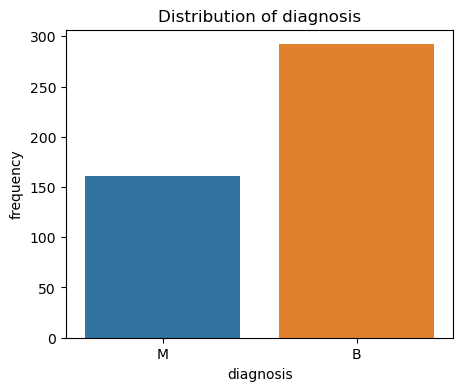

In [33]:
#barchart used here because the target variable is categorical
plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis',data=new_df)
plt.xlabel('diagnosis')
plt.ylabel('frequency')
plt.title('Distribution of diagnosis')
plt.show()


Figure 2:Distribution of the target class

Figure 2 shows that,category B with frequency 292 and category M with frequency 161.


### 3.1.8 Encoding categorical features

In [34]:
#Create a copy of the original dataframe
new_df1=new_df.copy()

label_encoder=LabelEncoder()

new_df1['diagnosis']=label_encoder.fit_transform(new_df1['diagnosis'])
print(new_df1[['diagnosis']])

     diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
448          0
449          1
450          1
451          1
452          0

[453 rows x 1 columns]


'LabelEncoder' used to encode the 'diagnosis' column.The 'diagnosis' column now contains numerical values(0 and 1)instead of the original categoricalvalues.Then, M is encoded as 1 and B is 0.

### 3.1.9 Correlation analysis

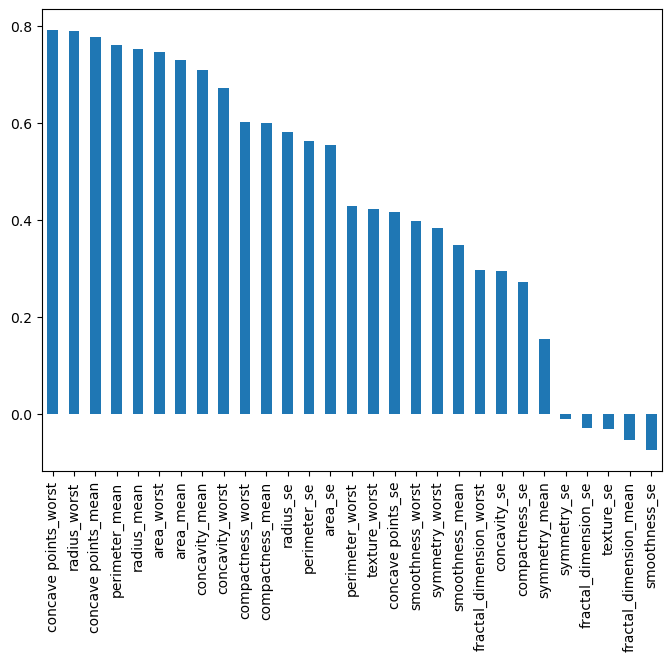

In [35]:
# check correlation between the target and the features
corr_with_tot_count =new_df1.corr()["diagnosis"].sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr_with_tot_count.drop("diagnosis").plot.bar()
plt.show()

This shows that correlation of features with target variable.'concave points_worst','radius_worst','concave points_mean','radius_mean','area_mean','area worst','concavity_mean' and 'perimeter_mean' have strong positive correlations with the 'diagnosis' column. Such as 'smoothness_se','fractal_dimension_mean','texture_se' and 'fractal_dimension_se' show weak negative correlations with 'diagnosis.

In [36]:
corr_with_tot_count

diagnosis                  1.000000
concave points_worst       0.790726
radius_worst               0.789579
concave points_mean        0.776056
perimeter_mean             0.760778
radius_mean                0.751410
area_worst                 0.745499
area_mean                  0.729038
concavity_mean             0.708837
concavity_worst            0.671949
compactness_worst          0.601973
compactness_mean           0.598689
radius_se                  0.579935
perimeter_se               0.563081
area_se                    0.554367
perimeter_worst            0.427359
texture_worst              0.422825
concave points_se          0.414779
smoothness_worst           0.397661
symmetry_worst             0.383147
smoothness_mean            0.347417
fractal_dimension_worst    0.296383
concavity_se               0.293879
compactness_se             0.270922
symmetry_mean              0.154302
symmetry_se               -0.010983
fractal_dimension_se      -0.029428
texture_se                -0

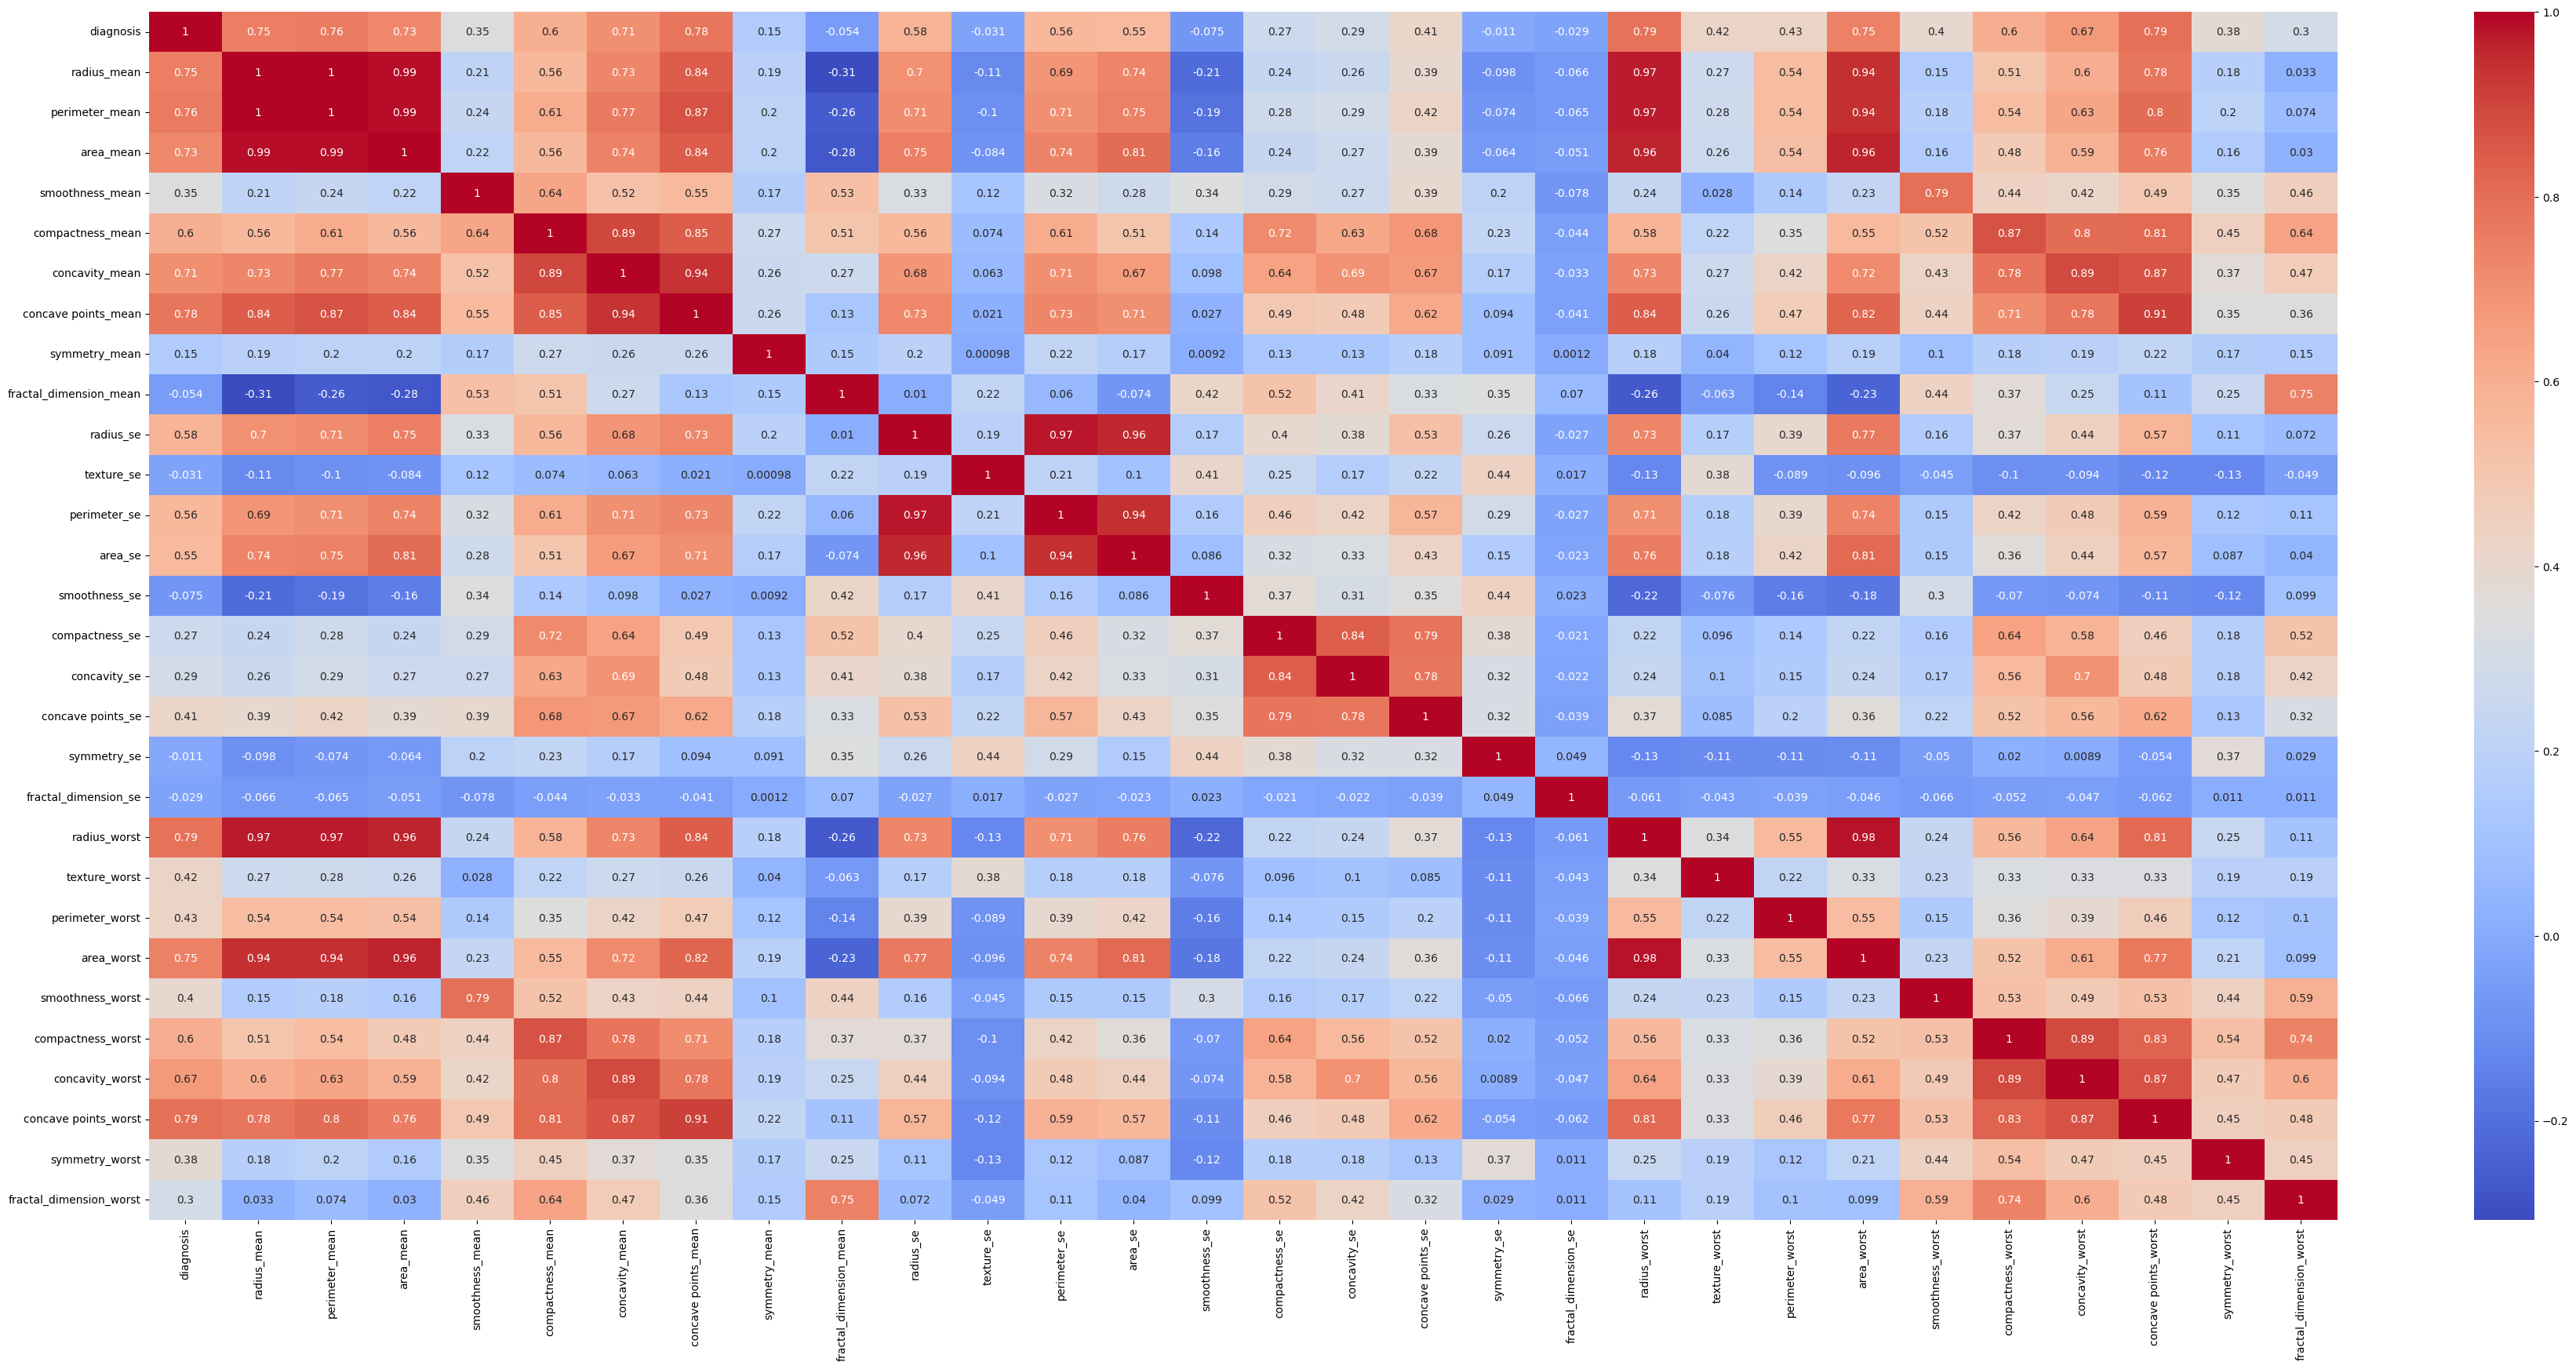

In [37]:
#visualizing the correlation
plt.figure(figsize=(45,20))
cor_matrix=new_df1.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.show()

Visualize the correlation matrix using a heatmap.Strongly correlated features shows that either dark red (positive) or dark blue(negative).

This code show the EDA vizualization relationship between features in a datset. It uses Seaborn's pairplot function to create a grid of scatterplots for multiple pairs of features, with the points colored by the 'diagnosis'category.Along the diagonal,represent the distribution of each variable using kernal density.In the lower triangle shows that scatterplots for each pair of variable.There are some overlapping between two featuressuch as texture_se and fractal_dimension_worst.

### 3.1.9.1 Feature selection - Method 1

In [40]:
# create correlation matrix
corr_matrix = new_df1.drop(['diagnosis'],axis=1).corr().abs()

# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# select one feature from the highly correlated features, threshold 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print(to_drop)

['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'radius_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


Supplied code that builds a correlation matrix and finds features that are highly correlated when a threshold of 0.8 is met.

In [41]:
print(len(to_drop),new_df1.shape)

12 (453, 30)


In [42]:
mthod1_df=new_df1.drop(to_drop,axis=1)
mthod1_df.head(3)

,diagnosis,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.006193,17.33,184.6,0.1622,0.4601,0.11890
1,1,20.57,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.003532,23.41,158.8,0.1238,0.2750,0.08902
2,1,19.69,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.004571,25.53,152.5,0.1444,0.3613,0.08758


In [ ]:
#visualizing the correlation
plt.figure(figsize=(45,20))
cor_matrix=mthod1_df.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.title('After removing highly correlated features' , fontsize=22, pad=20)
plt.show()

In [44]:
mthod1_df.shape

(453, 18)

Figure shows that first model after removing highly correlated features, resulting in a dataset with 453 rows and 18 columns. 

### 3.1.9.2 Feature selection - Method 2

In [45]:
# Create a list to store dictionaries of pairs and correlations
correlation_pairs_list = []

# Iterate through the highly correlated features and their correlations
for feature in to_drop:
    correlated_features = upper.index[upper[feature] > 0.8].tolist()
    correlations = upper[feature][upper[feature] > 0.8].tolist()

    # Add each pair and their correlation value to the list
    for i, correlated_feature in enumerate(correlated_features):
        correlation_pairs_list.append({
            'Feature_1': feature,
            'Feature_2': correlated_feature,
            'Correlation': correlations[i]
        })

# Create a DataFrame from the list of dictionaries
correlation_pairs = pd.DataFrame(correlation_pairs_list)

# Display the DataFrame
correlation_pairs

,Feature_1,Feature_2,Correlation
0,perimeter_mean,radius_mean,0.998031
1,area_mean,radius_mean,0.986986
2,area_mean,perimeter_mean,0.986530
3,concavity_mean,compactness_mean,0.894239
4,concave points_mean,radius_mean,0.844416
5,concave points_mean,perimeter_mean,0.869579
6,concave points_mean,area_mean,0.844497
7,concave points_mean,compactness_mean,0.846090
8,concave points_mean,concavity_mean,0.936690
9,perimeter_se,radius_se,0.974468


This additional code creates a list of dictionaries to store pairs of highly correlated features along with their correlation values. It then iterates through the highly correlated features identified earlier and populates the list with information about each correlated pair. Finally, it converts the list of dictionaries into a DataFrame for easier analysis.

In [46]:
# manual selection of features to drop, comparing 
to_drop_manual_list =['radius_mean',
'area_mean', 
'perimeter_mean',
'concavity_mean',
'compactness_mean',
'area_se',
'perimeter_se',                     
'compactness_se',
'radius_worst','compactness_worst','area_worst','concavity_worst','concave points_worst'
]

In [47]:
mthod2_df=new_df1.drop(to_drop_manual_list,axis=1)
mthod2_df.head(3)

,diagnosis,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,17.33,184.6,0.1622,0.4601,0.11890
1,1,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,23.41,158.8,0.1238,0.2750,0.08902
2,1,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,25.53,152.5,0.1444,0.3613,0.08758


In [48]:
mthod2_df.shape

(453, 17)

Subsequently, a manual comparison of the highly correlated features was conducted, leading to the creation of Model 2.In the second model has 453 rows and 17 column in the Dataframe.

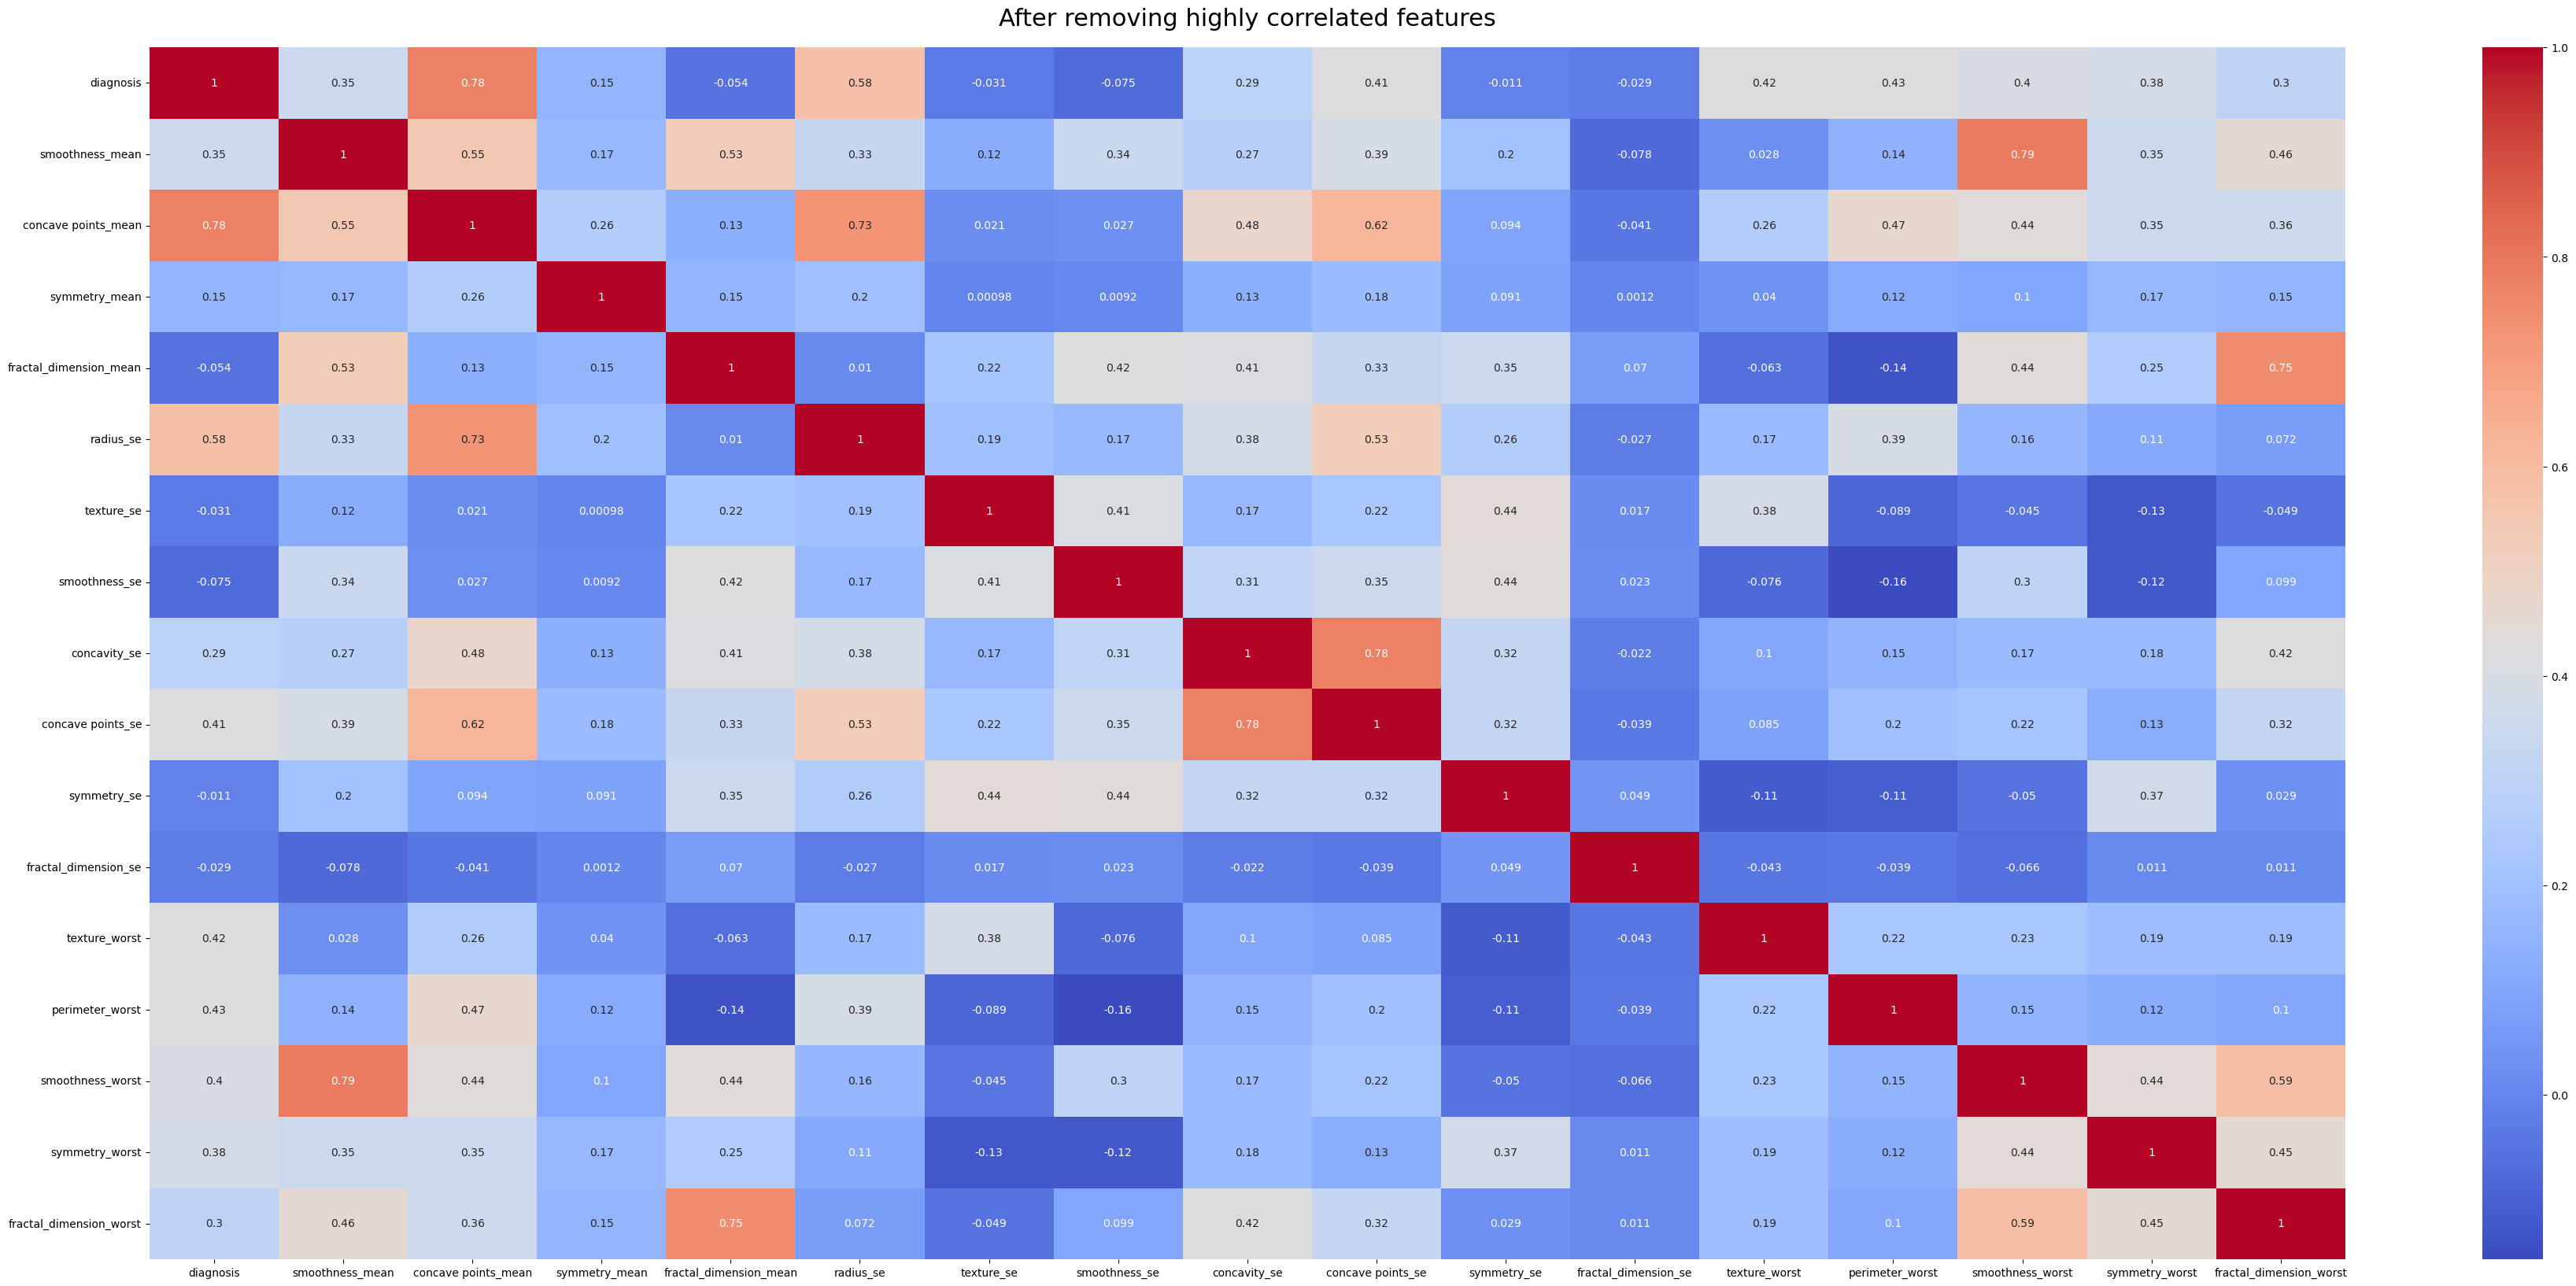

In [49]:
#visualizing the correlation
plt.figure(figsize=(45,20))
cor_matrix=mthod2_df.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.title('After removing highly correlated features' , fontsize=22, pad=20)
plt.show()

Figure shows that second model after removing highly correlated features

### 3.1.9.3 Feature selection - Method 3

In [50]:
# manual selection of features to drop, comparing 
to_drop_manual_list2 =['radius_mean',
'perimeter_mean',
'compactness_mean',
'area_mean',
'concavity_mean',
'area_se',
'radius_se',
'perimeter_se',
'compactness_se',
'concave points_mean',
'radius_worst',
'compactness_worst',
'concavity_worst']

In [51]:
mthod3_df=new_df1.drop(to_drop_manual_list2,axis=1)
mthod3_df.head(3)

,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.2419,0.07871,0.9053,0.006399,0.05373,0.01587,0.03003,0.006193,17.33,184.6,2019.0,0.1622,0.2654,0.4601,0.11890
1,1,0.08474,0.1812,0.05667,0.7339,0.005225,0.01860,0.01340,0.01389,0.003532,23.41,158.8,1956.0,0.1238,0.1860,0.2750,0.08902
2,1,0.10960,0.2069,0.05999,0.7869,0.006150,0.03832,0.02058,0.02250,0.004571,25.53,152.5,1709.0,0.1444,0.2430,0.3613,0.08758


In [52]:
mthod3_df.shape

(453, 17)

A manual comparison of the highly correlated features was conducted, leading to the creation of Model 3.In the third model also has 453 rows and 17 columns data frame.

In [ ]:
#visualizing the correlation
plt.figure(figsize=(45,20))
cor_matrix=mthod3_df.corr()
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm')
plt.title('After removing highly correlated features' , fontsize=22, pad=20)
plt.show()

Figure shows that second model after removing highly correlated features

# 3.2 CONCLUSION OF EDA

The initial dataset had 571 entries and 32 columns.
The "diagnosis" column had two unique values, with "Benign" being the most frequent.Negative and extremely low values were found in certain columns.Variability in feature scales across the dataset was observed.

Handled missing values, resulting in a dataset with 482 rows and 31 columns.Identified and removed 133 negative values, leading to 474 rows and 30 columns.Detected and removed two duplicate rows, resulting in a dataset of 472 entries and 30 columns.Addressed outliers, resulting in a final dataset of 453 rows and 30 columns.

In the initial stages of analysis, the decision was made to drop the 'ID' column, considering it unnecessary for specific analytical goals. Subsequently, null values and negative values within the dataset were addressed. It's important to note that, in real-world data scenarios, the approach to handling missing or negative values requires careful consideration.

For the missing values, a decision was made not to replace them with specific imputed values, such as the mean, median, or a constant. This choice is grounded in the understanding that in practical situations, measurements can vary significantly between individuals, making it challenging to derive a universally applicable replacement. This approach ensures that analysis does not introduce artificial biases or assumptions that might not align with the underlying data distribution.

Additionally, there were two types, B and M, based on which the data depended.Specifically, the 'texture_mean' column exhibited 125 negative values. In this case, the decision was made to remove the entire column rather than adopting imputation strategies or deleting individual rows with negative values. This choice was driven by the belief that outright removal of the column aligns more suitably with preserving the integrity of the dataset. It avoids the introduction of potentially inaccurate information through imputation and retains the consistency of the dataset structure.

Visualized the distribution of the "diagnosis" variable, highlighting the class imbalance.Encoded categorical features, transforming "diagnosis" into numerical values (0 and 1).

Explored correlations between features and the target variable ("diagnosis").Identified highly correlated features and created three models with reduced dimensions.Model 1 (18 columns), Model 2 (17 columns), and Model 3 (17 columns).

Features like 'concave points_worst,' 'radius_worst,' 'concave points_mean,' 'radius_mean,' 'area_mean,' 'area worst,' 'concavity_mean,' and 'perimeter_mean' showed strong positive correlations with the target variable.Certain features like 'smoothness_se,' 'fractal_dimension_mean,' 'texture_se,' and 'fractal_dimension_se' exhibited weak negative correlations.
Modeling:

Created three models with reduced features to address multicollinearity and improve interpretability.



# 4.0 Part 2

## 4.1 Unsupervised Machine Learning

## 4.1.1Clustering

### 4.1.1.1 Use the first dataset for clustering

In [54]:
features_df = mthod1_df.drop(['diagnosis'],axis=1)
target_arr = mthod1_df['diagnosis']

# scale features
sc=StandardScaler()
scaler = sc.fit(features_df)
features = sc.transform(features_df)
scaled_features = pd.DataFrame(features, columns = features_df.columns)
scaled_features.head(3)


,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1.080786,1.658789,3.545168,0.424295,2.602789,2.350341,-0.573701,-0.221262,1.453621,0.695837,1.101210,-0.003375,-1.343533,1.283216,1.449624,3.034615,2.648619
1,1.803105,-0.807722,-0.439431,-0.050401,-0.896981,0.460957,-0.891159,-0.603940,-0.667769,0.289179,-0.801956,-0.050694,-0.336396,0.838138,-0.348827,-0.204609,0.517669
2,1.556732,1.013950,1.187974,0.150583,-0.369792,1.153331,-0.792995,-0.302427,0.923863,1.471285,0.213302,-0.032218,0.014777,0.729456,0.615967,1.305629,0.414973


Selected first data set features are scaled using StandardScaler . This is a typical preprocessing step to guarantee that every feature has the same scale.

In [55]:
# Train/ Test Split using stratify sampling to solve the class imbalance problem
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target_arr, stratify = target_arr, test_size=0.2, random_state=33)

print(f'Percentage of diagnosis in train: {round(100 * (y_train[y_train == 1].shape[0] / len(y_train)),2)} %')
print(f'Percentage of diagnosis in test: {round(100 * (y_test[y_test == 1].shape[0] / len(y_test)),2)} %')

Percentage of diagnosis in train: 35.64 %
Percentage of diagnosis in test: 35.16 %


Employed a train/test split strategy. This involves partitioning the dataset into training and testing sets, allowing to train the model on one subset and assess its generalization on another.

The training dataset, roughly 35.64% have been assigned a positive class (diagnosis). The remaining 64.36% assigned with the negative class.Similarly, test dataset, approximately 35.16% labeled with the positive class and the rest part 64.84% assigned with the negative class.

#### k-means clustering

In [56]:
#build a model with 2 clusters
kmeans = KMeans(n_clusters = 2, init='k-means++',random_state=42)
kmeans.fit(X_train)

# print the silhouette score of this model
print("Training silhouette_score is :",silhouette_score(X_train, kmeans.labels_, metric='euclidean'))

print("Testing silhouette_score is :",silhouette_score(X_test, kmeans.predict(X_test), metric='euclidean'))

C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training silhouette_score is : 0.24520153535426867
Testing silhouette_score is : 0.26685687438246053


#### Hierarchical clustering

In [57]:
#build a model with 2 clusters
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_train)

# silhouette score
# print the silhouette score of this model
print("Training silhouette_score is :",silhouette_score(X_train, agg.labels_, metric='euclidean'))

print("Testing silhouette_score is :",silhouette_score(X_test, agg.fit_predict(X_test), metric='euclidean'))

Training silhouette_score is : 0.1794448752298898
Testing silhouette_score is : 0.2939447964152146


### 4.1.1.2 Use the second dataset for clustering

In [58]:
features_df_2 = mthod2_df.drop(['diagnosis'],axis=1)
target_arr2 = mthod2_df['diagnosis']

# scale features
sc=StandardScaler()
scaler_2 = sc.fit(features_df_2)
features_2 = sc.transform(features_df_2)
scaled_features_2 = pd.DataFrame(features_2, columns = features_df_2.columns)
scaled_features_2.head(3)


,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1.658789,2.539582,0.424295,2.602789,2.350341,-0.573701,-0.221262,0.889593,0.695837,1.101210,-0.003375,-1.343533,1.283216,1.449624,3.034615,2.648619
1,-0.807722,0.569605,-0.050401,-0.896981,0.460957,-0.891159,-0.603940,-0.446588,0.289179,-0.801956,-0.050694,-0.336396,0.838138,-0.348827,-0.204609,0.517669
2,1.013950,2.047920,0.150583,-0.369792,1.153331,-0.792995,-0.302427,0.303469,1.471285,0.213302,-0.032218,0.014777,0.729456,0.615967,1.305629,0.414973


Selected second data set features are scaled using StandardScaler . This is a typical preprocessing step to guarantee that every feature has the same scale.

In [59]:
X_tr, X_te, y_tr, y_te= train_test_split(scaled_features_2, target_arr2, stratify = target_arr2, test_size=0.2, random_state=33)

print(f'Percentage of diagnosis in train: {round(100 * (y_tr[y_tr == 1].shape[0] / len(y_train)),2)} %')
print(f'Percentage of diagnosis in test: {round(100 * (y_te[y_te == 1].shape[0] / len(y_test)),2)} %')

Percentage of diagnosis in train: 35.64 %
Percentage of diagnosis in test: 35.16 %


Employed a train/test split strategy. This involves partitioning the dataset into training and testing sets, allowing to train the model on one subset and assess its generalization on another.

The training dataset, roughly 35.64% have been assigned a positive class (diagnosis). The remaining 64.36% assigned with the negative class.Similarly, test dataset, approximately 35.16% labeled with the positive class and the rest part 64.84% assigned with the negative class.

#### k-means clustering

In [60]:
kmeans.fit(X_tr)

# print the silhouette score of this model
print("Training silhouette_score is :",silhouette_score(X_tr, kmeans.labels_, metric='euclidean'))
print("Testing silhouette_score is :",silhouette_score(X_te, kmeans.predict(X_te), metric='euclidean'))

C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training silhouette_score is : 0.2410047075344273
Testing silhouette_score is : 0.26139855674371343


#### Hierarchical clustering

In [61]:
#build a model with 2 clusters
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_tr)

# silhouette score
# print the silhouette score of this model
print("Training silhouette_score is :",silhouette_score(X_tr, agg.labels_, metric='euclidean'))

print("Testing silhouette_score is :",silhouette_score(X_te, agg.fit_predict(X_test), metric='euclidean'))

Training silhouette_score is : 0.14649839327732306
Testing silhouette_score is : 0.28573084309923064


### 4.1.1.3 Use the third dataset for clustering

In [62]:
features_df_3 = mthod3_df.drop(['diagnosis'],axis=1)
target_arr3 = mthod3_df['diagnosis']

sc=StandardScaler()
scaler_3 = sc.fit(features_df_3)
features_3 = sc.transform(features_df_3)
scaled_features_3 = pd.DataFrame(features_3, columns = features_df_3.columns)
scaled_features_3.head(3)


,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.658789,0.424295,2.602789,-0.573701,-0.221262,0.889593,0.695837,1.101210,-0.003375,-1.343533,1.283216,1.939671,1.449624,2.408609,3.034615,2.648619
1,-0.807722,-0.050401,-0.896981,-0.891159,-0.603940,-0.446588,0.289179,-0.801956,-0.050694,-0.336396,0.838138,1.832193,-0.348827,1.165559,-0.204609,0.517669
2,1.013950,0.150583,-0.369792,-0.792995,-0.302427,0.303469,1.471285,0.213302,-0.032218,0.014777,0.729456,1.410814,0.615967,2.057925,1.305629,0.414973


Selected second data set features are scaled using StandardScaler . This is a typical preprocessing step to guarantee that every feature has the same scale.

In [63]:
X_tr2, X_te2, y_tr2, y_te2= train_test_split(scaled_features_3, target_arr3, stratify = target_arr3, test_size=0.2, random_state=33)

print(f'Percentage of diagnosis in train: {round(100 * (y_tr2[y_tr2 == 1].shape[0] / len(y_train)),2)} %')
print(f'Percentage of diagnosis in test: {round(100 * (y_te2[y_te2 == 1].shape[0] / len(y_test)),2)} %')

Percentage of diagnosis in train: 35.64 %
Percentage of diagnosis in test: 35.16 %


Employed a train/test split strategy. This involves partitioning the dataset into training and testing sets, allowing to train the model on one subset and assess its generalization on another.

The training dataset, roughly 35.64% have been assigned a positive class (diagnosis). The remaining 64.36% assigned with the negative class.Similarly, test dataset, approximately 35.16% labeled with the positive class and the rest part 64.84% assigned with the negative class.

#### k-means clustering

In [64]:
kmeans.fit(X_tr2)

# print the silhouette score of this model
print("Training silhouette_score is :",silhouette_score(X_tr2, kmeans.labels_, metric='euclidean'))
print("Testing silhouette_score is :",silhouette_score(X_te2, kmeans.predict(X_te2), metric='euclidean'))

C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training silhouette_score is : 0.2272665481898962
Testing silhouette_score is : 0.2490533996125535


#### Hierarchical clustering

In [65]:
#build a model with 2 clusters
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_tr2)

# silhouette score
# print the silhouette score of this model
print("Training silhouette_score is :",silhouette_score(X_tr2, agg.labels_, metric='euclidean'))

print("Testing silhouette_score is :",silhouette_score(X_te2, agg.fit_predict(X_test), metric='euclidean'))

Training silhouette_score is : 0.181715876711575
Testing silhouette_score is : 0.2908408277079033


I will continue with the first feature set since it has higher silhouette_score.

In [66]:
# Assign a label to the clusters
clusters = kmeans.fit_predict(X_test.iloc[:,1:])
X_test["label"] = clusters
X_test.head(5)

C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst,label
208,1.408349,0.457043,0.895578,0.019983,-0.018862,0.778195,-0.396450,0.102416,0.005341,0.211799,-0.747715,-0.052223,1.732542,0.855389,2.198979,0.684384,1.101042,0
266,-1.266470,-0.802593,-0.166261,0.124775,1.418203,-0.769284,-0.504060,-0.366315,0.608251,-0.515904,-0.376279,-0.041820,-0.392716,-0.672196,-0.372245,0.201387,1.175925,1
158,-0.075484,0.501009,1.023752,0.179518,1.086328,-0.522962,-0.038986,-0.364359,0.588783,0.445586,-0.153417,-0.032413,0.246683,-0.100322,0.690902,1.335378,1.721499,0
339,-0.394648,-1.231264,-1.108738,-0.326460,-1.092294,-0.389009,-0.613892,0.084489,-0.746820,-0.991216,-0.152238,-0.092518,-0.742233,-0.368231,-1.145017,-1.228351,-1.534118,1
99,1.209571,-0.107192,-0.069931,-0.144245,-0.801705,0.640474,-0.024169,-0.350995,-0.600517,-0.410864,-0.680502,-0.074291,0.985471,0.610423,0.714320,0.423636,-0.403745,1


The code provided is assigning cluster labels in the test set.

In [67]:
X_test.columns

Index(['radius_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'label'],
      dtype='object')

<Axes: xlabel='radius_mean', ylabel='radius_se'>

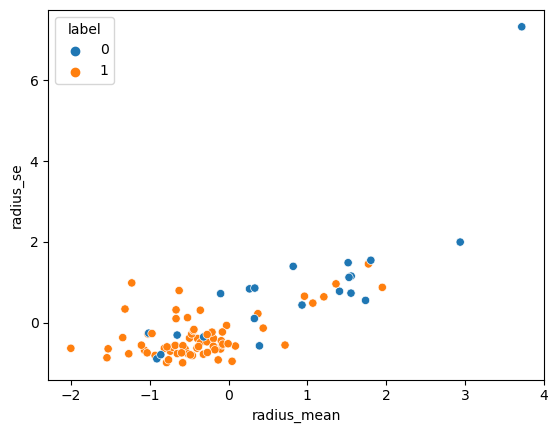

In [68]:
import seaborn as sns
sns.scatterplot(data=X_test, x= 'radius_mean', y='radius_se', hue='label')

This scatter plot allows  to visually inspect how data points with different cluster labels are distributed across the 'radius_mean' and 'radius_se' features. The use of color helps differentiate between clusters in the plot. We can see some overlapping.

<Axes: xlabel='radius_mean', ylabel='compactness_mean'>

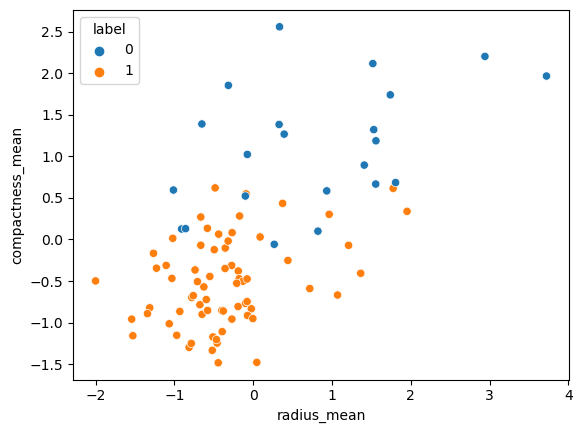

In [69]:
# select features that are highly correlated with target, much better cluster view
sns.scatterplot(data=X_test, x= 'radius_mean', y='compactness_mean', hue='label')

This scatter plot allows  to understanding how clusters are formed in the context of features that have a higher correlation with the target variable across the 'radius_mean' and 'radius_se' features. The use of color helps differentiate between clusters in the plot. 

## 4.1.2 Dimensionality reduction  

### 4.1.2.1 .Principal Component Analysis (PCA)

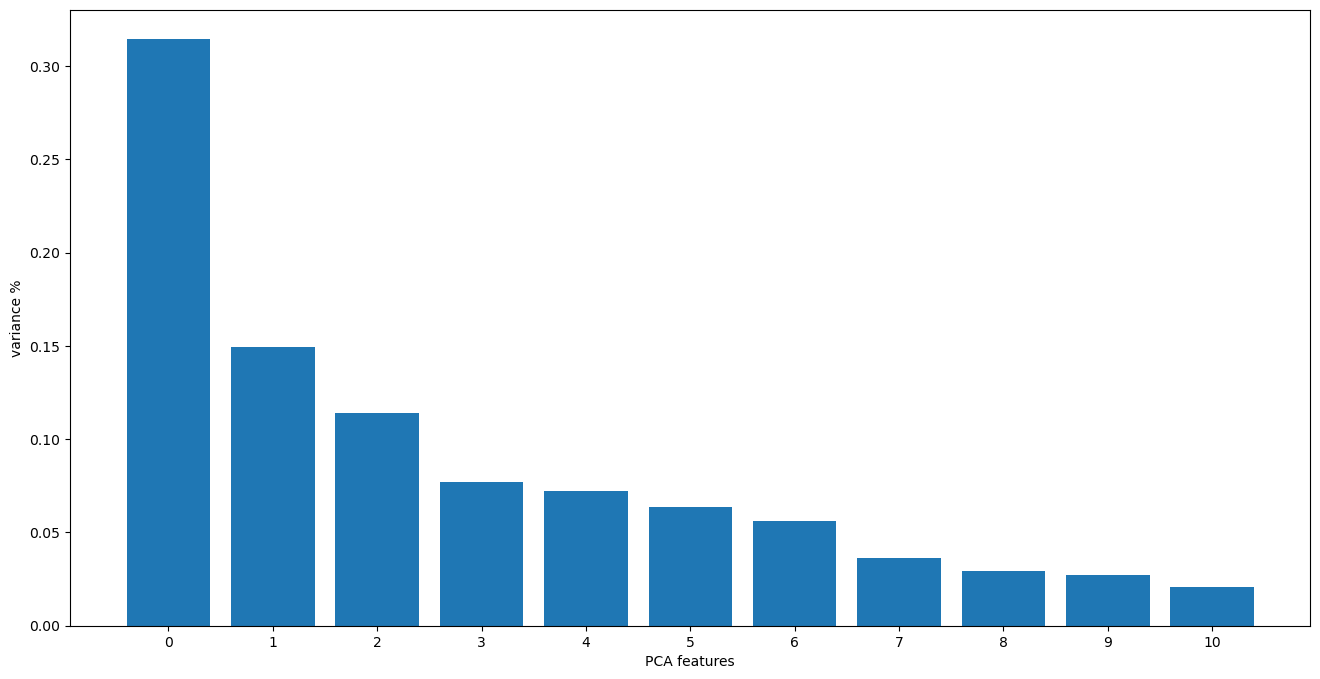

In [70]:
pca = PCA(0.95)
pc_xtrain = pca.fit_transform(X_train)

features = range(pca.n_components_)
plt.figure(figsize=(16,8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_com_train = pd.DataFrame(pc_xtrain)

Used PCA for dimensionality reduction.First two PCA components,it explains most the variance in data.

In [71]:
# predicting for test data
X_test_new= X_test.drop(['label'],axis=1)

pc_xtest=pca.transform(X_test_new)
PCA_com_test = pd.DataFrame(pc_xtest)

This code used to remove 'label' column from X_test.

In [72]:
print(PCA_com_train.shape, PCA_com_test.shape)

(362, 11) (91, 11)


After using PCA,the PCA_com_train's shape becomes  rows 362 and 11 columns, and PCA_com_test shape becomes 91 rows and 11 columns.


Text(0, 0.5, 'PC2')

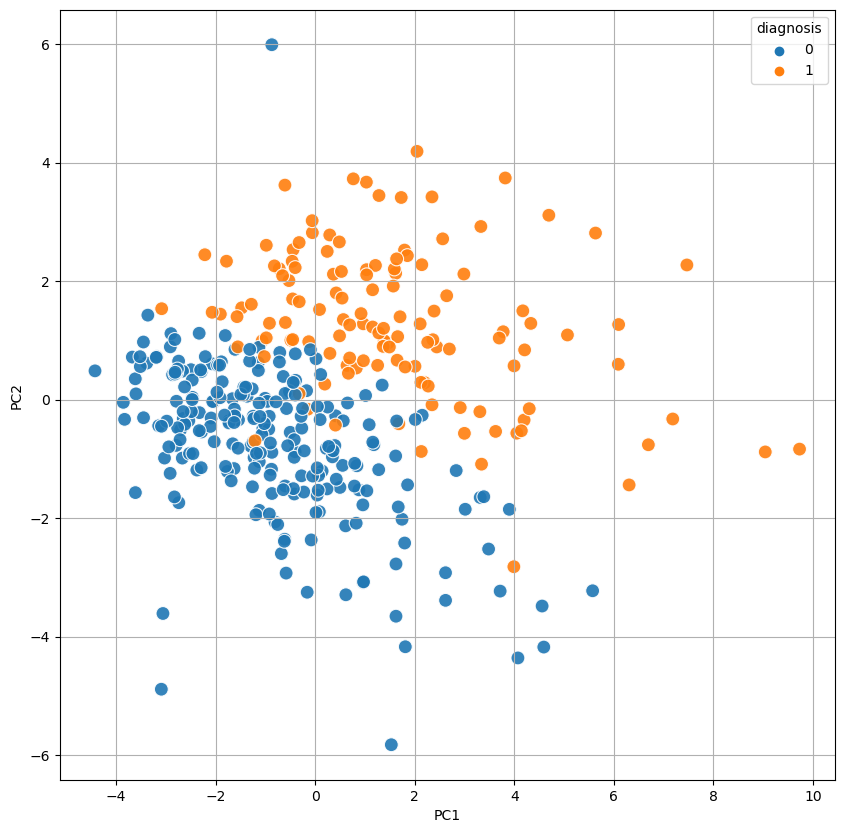

In [73]:
#visualize the distribution of data points in the reduced-dimensional space defined by the first two principal components
plt.figure(figsize=(10,10))
sns.scatterplot(data=None,
               x=pc_xtrain[:,0],
               y=pc_xtrain[:,1],
               hue=y_train,
               s=100,
               alpha=0.9)
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')

The code provided is for visualizing the distribution of data points in the reduced-dimensional space defined by the first two principal components. 

### k-means clustering

In [74]:
# 50% percent of variance explained by two components
model_kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
model_kmeans.fit(PCA_com_train.iloc[:,:2])

# silhouette score
print("silhouette_score is traing set :",silhouette_score(PCA_com_train.iloc[:,:2], model_kmeans.labels_, metric='euclidean')) 
print("silhouette_score is testing set:",silhouette_score(PCA_com_test.iloc[:,:2], model_kmeans.predict(PCA_com_test.iloc[:,:2]), metric='euclidean')) 

C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


silhouette_score is traing set : 0.4133053307287024
silhouette_score is testing set: 0.45006481402870857


After using PCA for k-means clustering ,silhouette_score is  0.4133053307287024 for training set and 0.45006481402870857 for testing set.

In [75]:
# 50% percent of variance explained by two components
#model = KMeans(n_clusters=2, init='k-means++',random_state=42)
#model.fit(PCA_com_train)

# silhouette score
#print("silhouette_score is :",silhouette_score(PCA_com_train, model.labels_, metric='euclidean')) 
#print("silhouette_score is :",silhouette_score(PCA_com_test, model.predict(PCA_com_test), metric='euclidean')) 

In [76]:
pred = model_kmeans.predict(PCA_com_test.iloc[:,:2])
X_test_new['cluster'] = pred
avg_df = X_test_new.groupby(['cluster'], as_index=False).mean()
avg_df.head(3)

,cluster,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,0.566287,0.844354,0.942471,0.655749,0.552612,0.704716,0.204908,0.134228,0.44744,0.631878,0.275915,-0.033734,0.686508,0.754853,0.722819,0.837929,0.827053
1,1,-0.364048,-0.371276,-0.581258,-0.170957,-0.214548,-0.393179,-0.059197,-0.199418,-0.49492,-0.564542,-0.111668,-0.062610,-0.115127,-0.295496,-0.312245,-0.191594,-0.296636


                        Table 1

Predicted the cluster labels for the test set data points using the k-means model , and then adding these cluster labels to a new column called 'cluster' in  X_test_new DataFrame. Then,grouping the data by the 'cluster' column and calculating the mean for each cluster. 

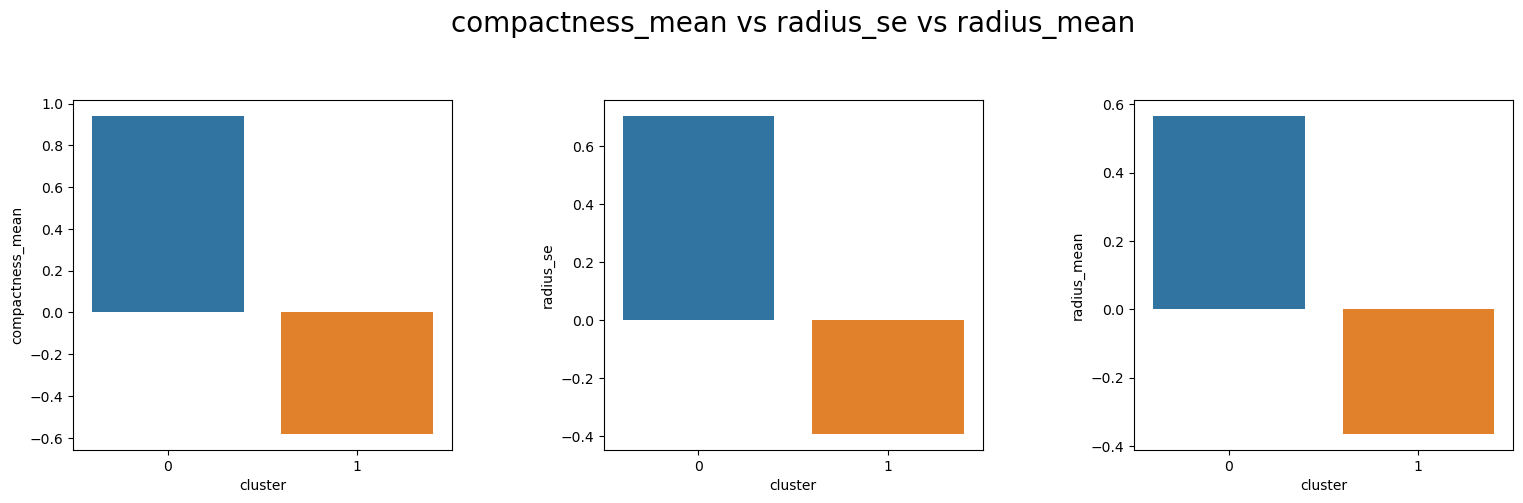

In [77]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='compactness_mean',data=avg_df ,ax=ax[0])
sns.barplot(x='cluster',y='radius_se',data=avg_df, ax=ax[1])
sns.barplot(x='cluster',y='radius_mean',data=avg_df, ax=ax[2])
plt.suptitle('compactness_mean vs radius_se vs radius_mean',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

These three subplots shows that the average values of 'compactness_mean', 'radius_se' and 'radius_mean' across the clusters.We can see,in cluster 0(B) has high average valu than cluster 1.

### Hierarchical Clustering

In [78]:
# 50% percent of variance explained by two components
model_hc = AgglomerativeClustering(n_clusters=2)
model_hc.fit(PCA_com_train.iloc[:,:2])

# silhouette score
print("silhouette_score is for traing set:",silhouette_score(PCA_com_train.iloc[:,:2], model_hc.labels_, metric='euclidean')) 
print("silhouette_score is for testing set:",silhouette_score(PCA_com_test.iloc[:,:2], model_hc.fit_predict(PCA_com_test.iloc[:,:2]), metric='euclidean')) 

silhouette_score is for traing set: 0.4731114365484893
silhouette_score is for testing set: 0.41058426720898705


After using PCA for hierarchical clustering ,silhouette_score is 0.4731114365484893 for training set and 0.41058426720898705 for testing set.

In [79]:
pred2 = model_hc.fit_predict(PCA_com_test.iloc[:,:2])
X_test_new['cluster'] = pred2
avg1_df = X_test_new.groupby(['cluster'], as_index=False).mean()
avg1_df.head(3)

,cluster,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.624333,-0.300075,-0.61980,-0.161558,0.077262,-0.460498,0.077032,0.052741,-0.452671,-0.585963,0.004245,-0.055490,-0.211932,-0.441355,-0.299174,-0.336371,-0.209308
1,1,0.854605,0.498189,0.73317,0.488920,-0.099750,0.623417,-0.082545,-0.369624,0.201846,0.451997,0.001721,-0.051499,0.710898,0.820238,0.511653,0.905200,0.469260


                            Table 2

Predicted the cluster labels for the test set data points using the hierarchical model , and then adding these cluster labels to a new column called 'cluster' in  X_test_new DataFrame. Then,grouping the data by the 'cluster' column and calculating the mean for each cluster. 

C:\Users\ish17\AppData\Local\Temp\ipykernel_15556\1714453763.py:13: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


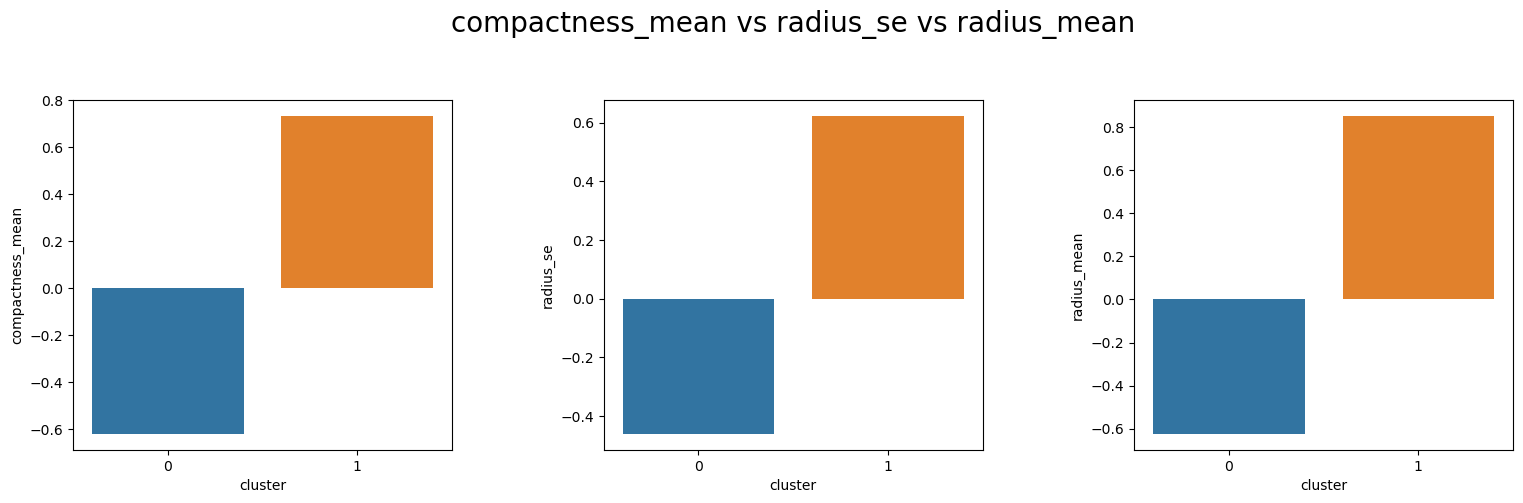

In [80]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='compactness_mean',data=avg1_df ,ax=ax[0])
sns.barplot(x='cluster',y='radius_se',data=avg1_df, ax=ax[1])
sns.barplot(x='cluster',y='radius_mean',data=avg1_df, ax=ax[2])
plt.suptitle('compactness_mean vs radius_se vs radius_mean',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

These three subplots shows that the average values of 'compactness_mean', 'radius_se' and 'radius_mean' across the clusters.We can see,in cluster 1(M) has high average valu than cluster 0.

### 4.1.2.2 t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [81]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2,random_state=42)

#fit and transform the training data
tsne_xtrain=t_sne.fit_transform(X_train)
TSNE_com_train=pd.DataFrame(tsne_xtrain,columns=['TSNE1','TSNE2'])

# predicting for test data
X_test_new= X_test.drop(['label'],axis=1)

tsne_xtest=pca.transform(X_test_new)
TSNE_com_test = pd.DataFrame(tsne_xtest)
TSNE_com_train=pd.DataFrame(tsne_xtrain,columns=['TSNE1','TSNE2'])




Used t-SNE for dimensionality reduction.

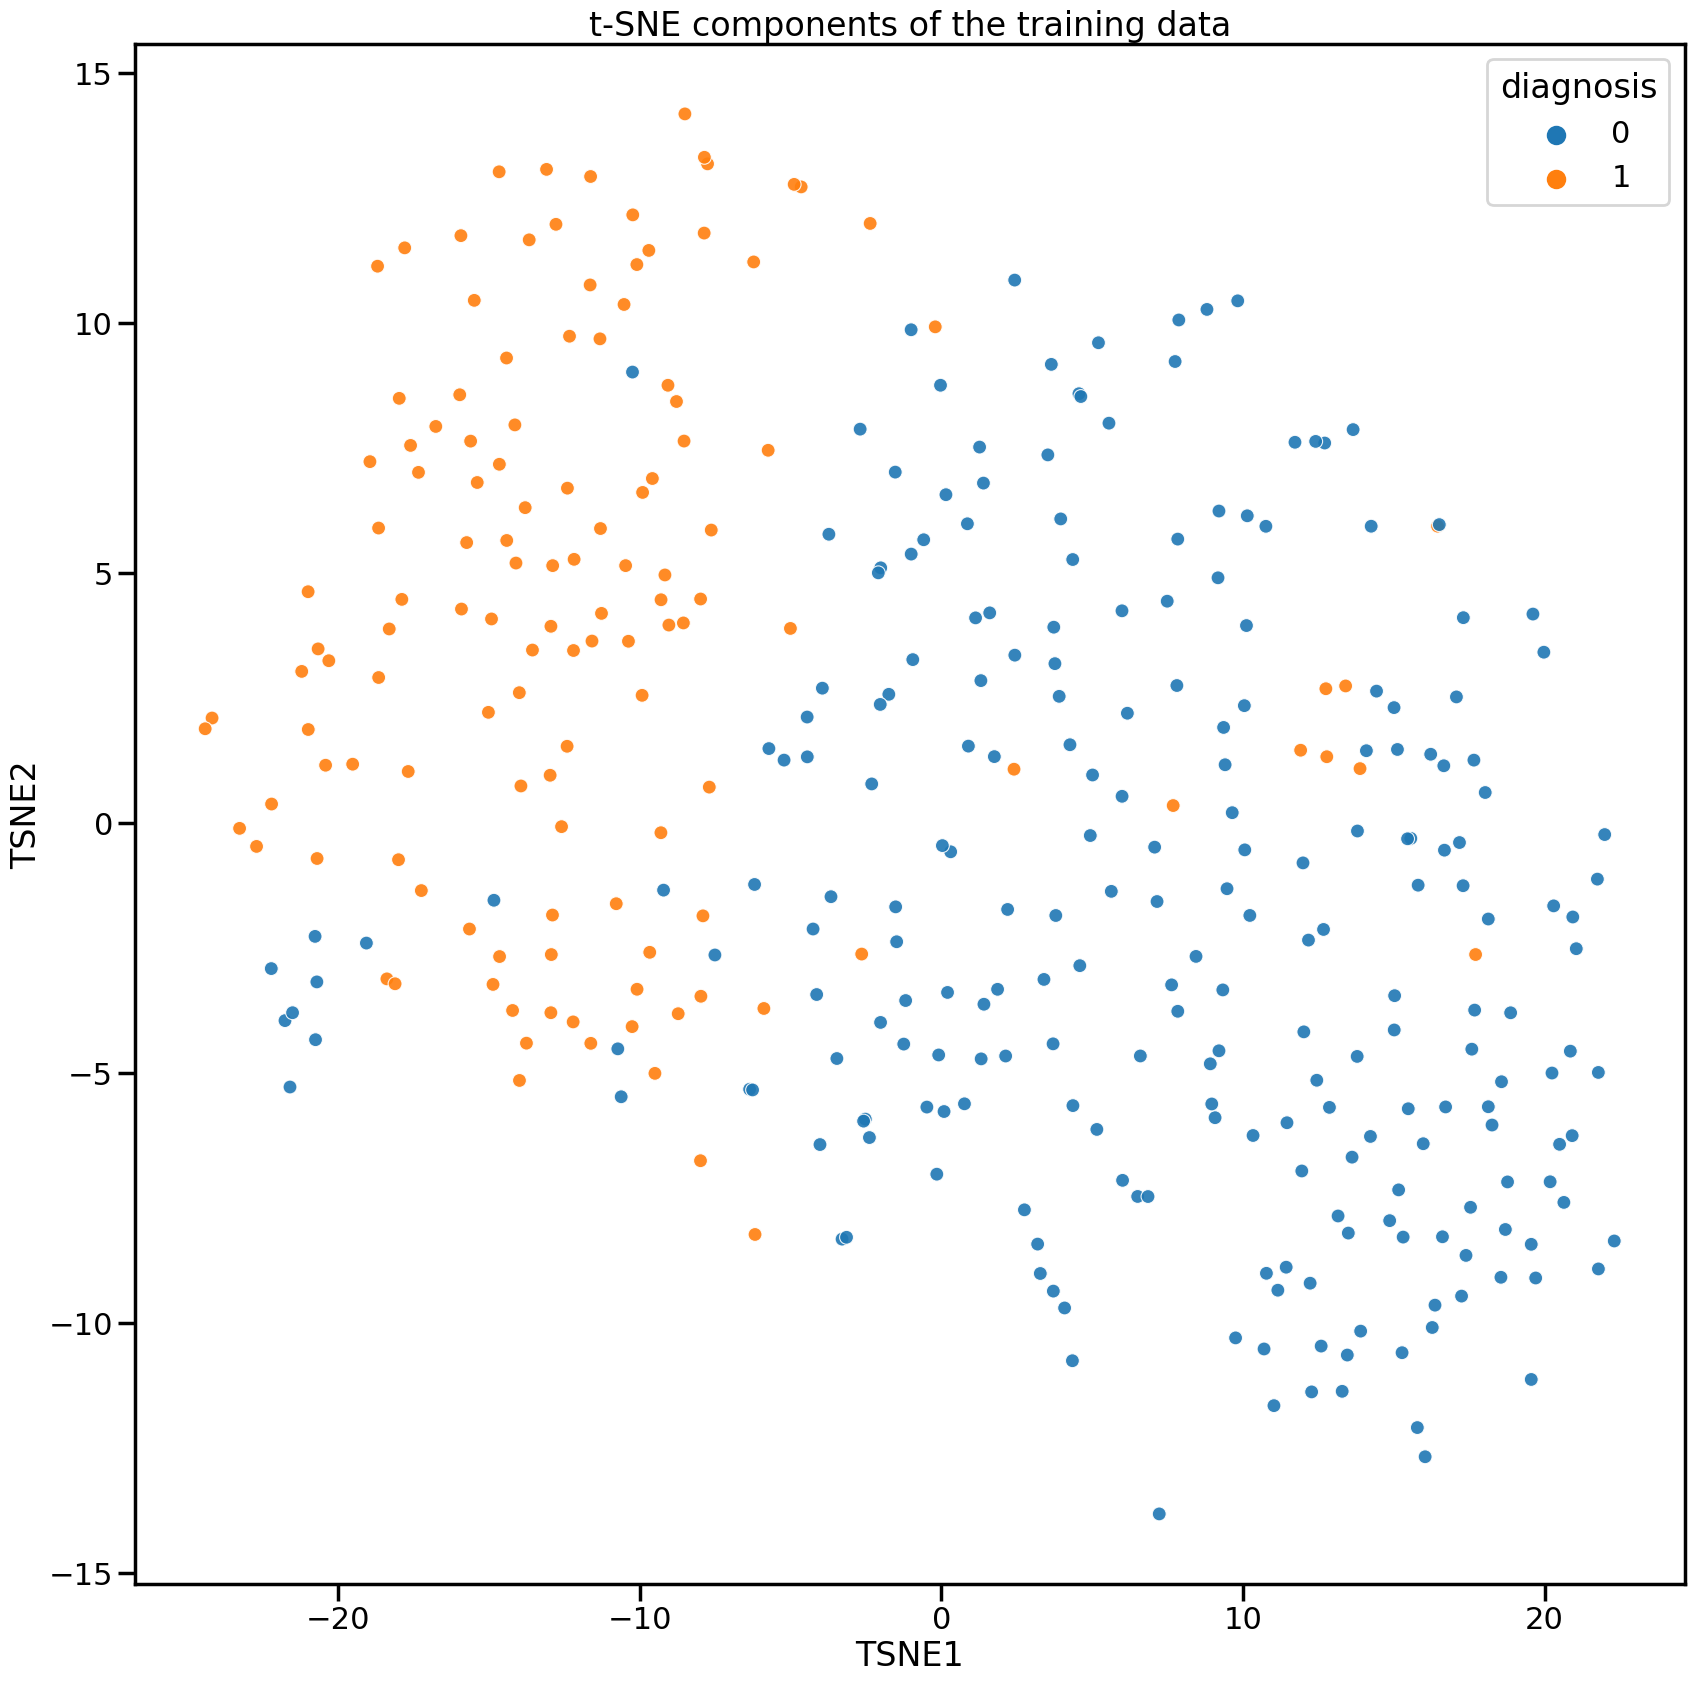

In [82]:
# visualizing
plt.figure(figsize=(20, 20))
sns.set_context('poster')
sns.scatterplot(data=None,
               x=tsne_xtrain[:,0],
               y=tsne_xtrain[:,1],
               hue=y_train,
               s=100,
               alpha=0.9)
plt.title('t-SNE components of the training data')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


### k-means clustering

In [83]:
# 50% percent of variance explained by two components
model1_kmeans = KMeans(n_clusters=2, init='k-means++',random_state=42)
model1_kmeans.fit(TSNE_com_train.iloc[:,:2])

# silhouette score
print("silhouette_score is for traing set:",silhouette_score(TSNE_com_train.iloc[:,:2], model1_kmeans.labels_, metric='euclidean')) 
print("silhouette_score is for testing set:",silhouette_score(TSNE_com_test.iloc[:,:2], model1_kmeans.fit_predict(TSNE_com_test.iloc[:,:2]), metric='euclidean')) 

C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


silhouette_score is for traing set: 0.5120092


C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ish17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette_score is for testing set: 0.4662368372093699


After using t-SNE for k-means clustering ,silhouette_score is 0.5120092 for training set and 0.4662368372093699 for testing set.

In [84]:
pred = model1_kmeans.predict(TSNE_com_test.iloc[:,:2])
X_test_new['cluster'] = pred
avg2_df = X_test_new.groupby(['cluster'], as_index=False).mean()
avg2_df.head(3)

,cluster,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.495536,-0.323191,-0.570017,-0.151524,-0.071606,-0.424422,0.012965,-0.089364,-0.444240,-0.551124,-0.015256,-0.058934,-0.158746,-0.365123,-0.315618,-0.17556,-0.238553
1,1,0.930787,0.770895,0.972975,0.638964,0.224761,0.825051,0.034658,-0.128075,0.356985,0.644349,0.049793,-0.041814,0.826386,0.969319,0.771062,0.83744,0.725065


                            Table 3

Predicted the cluster labels for the test set data points using the kmeans model , and then adding these cluster labels to a new column called 'cluster' in  X_test_new DataFrame. Then,grouping the data by the 'cluster' column and calculating the mean for each cluster

C:\Users\ish17\AppData\Local\Temp\ipykernel_15556\1766380116.py:13: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


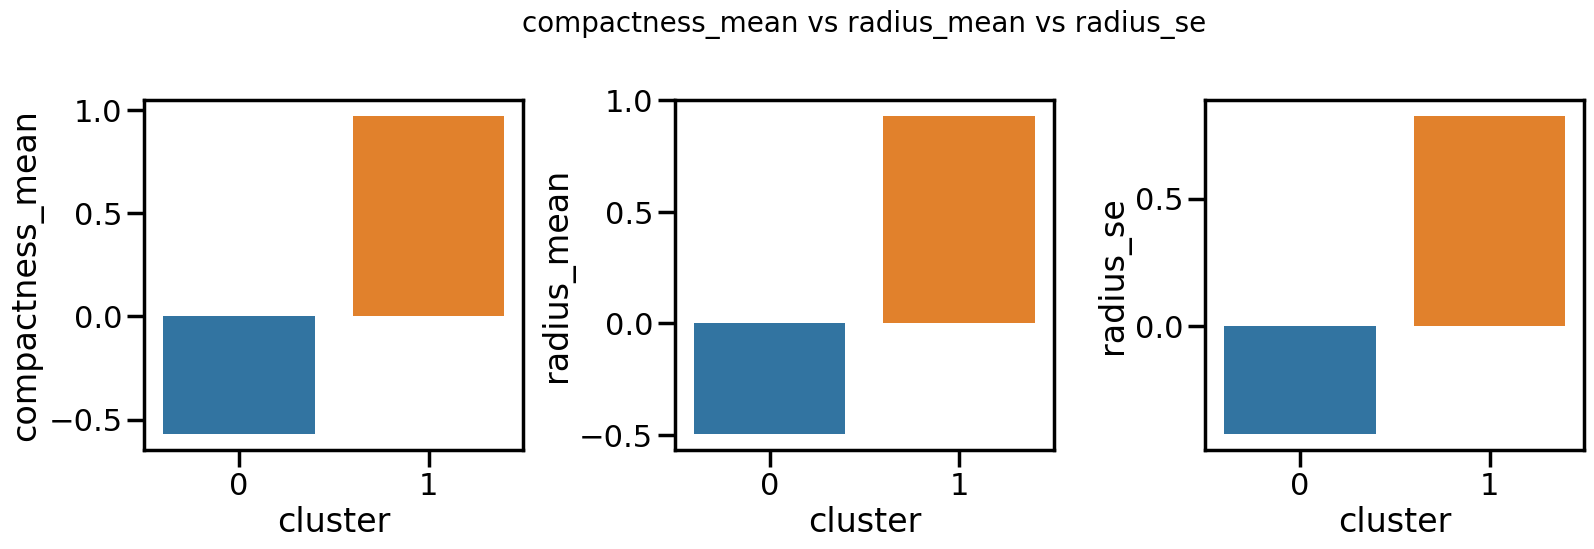

In [85]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='compactness_mean',data=avg2_df ,ax=ax[0])
sns.barplot(x='cluster',y='radius_mean',data=avg2_df, ax=ax[1])
sns.barplot(x='cluster',y='radius_se',data=avg2_df, ax=ax[2])
plt.suptitle('compactness_mean vs radius_mean vs radius_se',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

These three subplots shows that the average values of 'compactness_mean', 'radius_se' and 'radius_mean' across the clusters.We can see,in cluster 1(M) has high average valu than cluster 0.

### Hierarchical clustering

In [86]:
# 50% percent of variance explained by two components
model1_hc = AgglomerativeClustering(n_clusters=2)
model1_hc.fit(TSNE_com_train.iloc[:,:2])

# silhouette score
print("silhouette_score is for traing set:",silhouette_score(TSNE_com_train.iloc[:,:2], model1_hc.labels_, metric='euclidean')) 
print("silhouette_score is for testing set:",silhouette_score(TSNE_com_test.iloc[:,:2], model1_hc.fit_predict(TSNE_com_test.iloc[:,:2]), metric='euclidean')) 

silhouette_score is for traing set: 0.47222343
silhouette_score is for testing set: 0.41058426720898705


After using t-SNE for hierarchical clustering ,silhouette_score is 0.47222343 for training set and 0.41058426720898705 for testing set.

In [87]:
pred = model1_hc.fit_predict(TSNE_com_test.iloc[:,:2])
X_test_new['cluster'] = pred
avg3_df = X_test_new.groupby(['cluster'], as_index=False).mean()
avg3_df.head(3)

,cluster,radius_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0,-0.624333,-0.300075,-0.61980,-0.161558,0.077262,-0.460498,0.077032,0.052741,-0.452671,-0.585963,0.004245,-0.055490,-0.211932,-0.441355,-0.299174,-0.336371,-0.209308
1,1,0.854605,0.498189,0.73317,0.488920,-0.099750,0.623417,-0.082545,-0.369624,0.201846,0.451997,0.001721,-0.051499,0.710898,0.820238,0.511653,0.905200,0.469260


                            Table 4

Predicted the cluster labels for the test set data points using the hierarchical model , and then adding these cluster labels to a new column called 'cluster' in X_test_new DataFrame. Then,grouping the data by the 'cluster' column and calculating the mean for each cluster

# 4.2 CONCLUSION OF CLUSTERING USING EDA AND DIMENSIONALITY REDUCTION

### Before Dimensional Reduction:
 
Across all datasets,the diagnosis percentages for both training and testing are consistent indicating a blanced distribution of classes.The testing silhouette scores for hierarchical clustering are consistently higher than training scores,suggesting good generalization to unseen data.

The silhouette scores for K-means in the first dataset are higher than those in the other datasets.This suggests that the clusters formed by K-means in the first dataset are more well-defined and separated.So,I will continue with the first feature set.

### After using Dimensional Reduction :

In PCA, improved clustering performance compared to the original features,especially for k-means clustering.In t-SNE,significant in silhouette scores for both k-means and hierarchical clustering,indicating better-defined clusters in the reduced-dimensional space.

Hierarchical clustering generally exhibits higher silhouette scores in the original feature space.After t-SNE, k-means achieves higher silhouette scores, suggesting t-SNE may be more beneficial for k-means clustering in this context.

Table 1,2,3,4 implies that mean values of the features.

Table 1:Cluster 0 has positive values for features.Subsequently, higher average valuues observed in features such as 'radius_mean','smoothness_mean'.These average values in features suggest a tendency toward malignancy.But cluster 1 has negative values for the same features and lower average values.So,features suggesting a tendency toward benign characteristics.

Table 2,Table 3 and Table 4:Cluster 0 has lower average values,suggesting a potential tendency toward benign.Cluster 1 has higher average values in features,suggesting a tendency toward malignancy characteristics.





# 5.0 Part 3

## 5.1 Supervised Machine Learning

## 5.2 Classification

## 5.2.1 Using dimensional reduction (PCA)

### 5.2.1.1 Binary Logistic Regression

In [88]:
#Logistic Regresion
log_regression=LogisticRegression()
log_regression.fit(PCA_com_train,y_train)
y_pred=log_regression.predict(PCA_com_test)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
classification_report_result=classification_report(y_test,y_pred)

print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")

print("Classification Report:\n",classification_report_result)

Accuracy:0.945054945054945
Precision:1.0
Recall:0.84375
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        59
           1       1.00      0.84      0.92        32

    accuracy                           0.95        91
   macro avg       0.96      0.92      0.94        91
weighted avg       0.95      0.95      0.94        91



AUC-ROC:0.9936440677966101


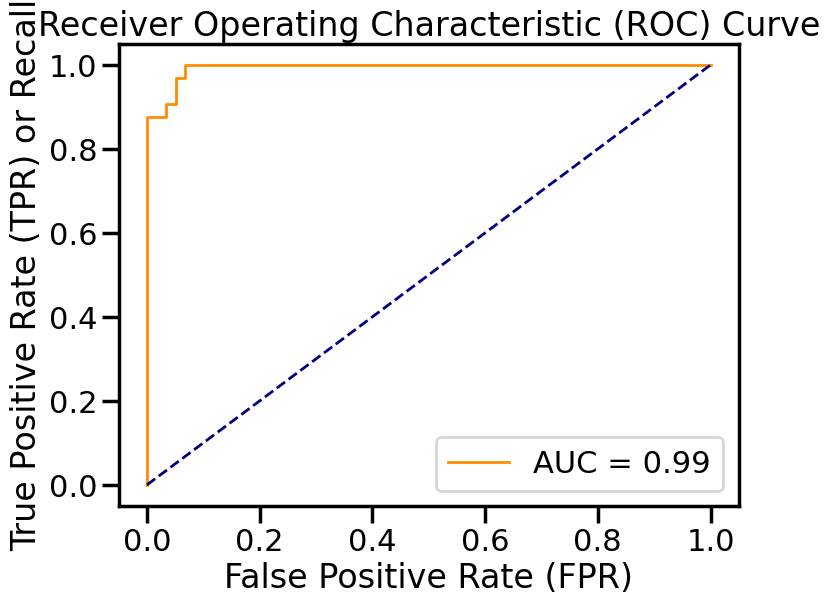

In [89]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob=log_regression.predict_proba(PCA_com_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

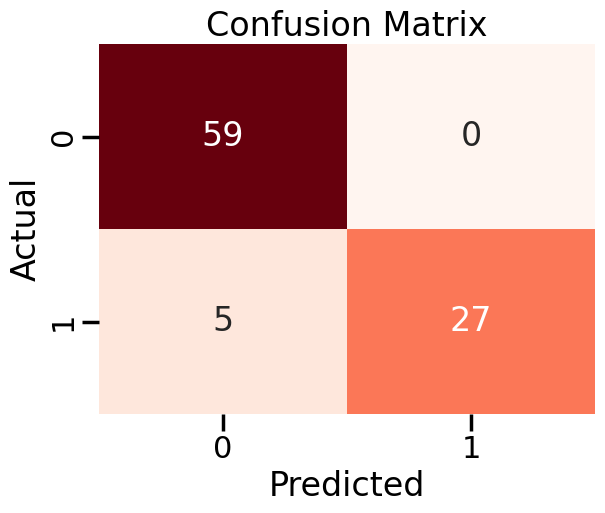

In [90]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test,y_pred)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="Reds",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9451 Precision: 0.92,indicating that 92% of the instances predicted as calss 0 are actually class 0. 1.00,indicating that all instances predicted as Class 1 are indeed Class 1.

Recall: 1.00,meaning the model correctly identifies all actual instances of Class 0. 0.84,suggesting that the model identifies 84% of the actual instances of Class 1.

F1-score: 0.96,which is the harmonic mean of precision and recall for Class 0. 0.92,which is the harmonic mean of precision and recall for Class 1. AUC-ROC:0.9936440677966101,which indicates a very high discriminatory ability of the model. A value close to 1 suggests excellent performance.

confusion matrix: True Negatives (TN): 59 - The number of True Negatives (TN) that were accurately predicted as Class 0(B) was 59. False Positives (FP): 0 - Mispredicted instances that belong to Class 1(M). False Negatives (FN): 5 - Instances incorrectly predicted as Class 0(B). True Positives (TP): 27 - Instances that were accurately predicted to be Class 1(M).

### 5.2.1.2 K-Nearest Neighbors

In [91]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(PCA_com_train,y_train)
y_pred_knn= knn_classifier.predict(PCA_com_test)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred_knn)
precision=precision_score(y_test,y_pred_knn)
recall=recall_score(y_test,y_pred_knn)
classification_report_result=classification_report(y_test,y_pred_knn)

print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")

print("Classification Report:\n",classification_report_result)

Accuracy:0.945054945054945
Precision:0.9655172413793104
Recall:0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.97      0.88      0.92        32

    accuracy                           0.95        91
   macro avg       0.95      0.93      0.94        91
weighted avg       0.95      0.95      0.94        91



AUC-ROC:0.987552966101695


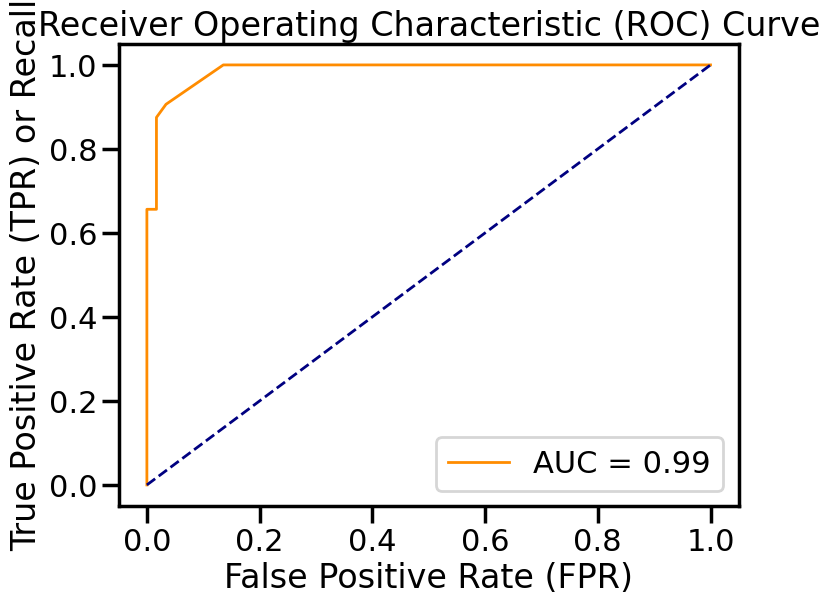

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob=knn_classifier.predict_proba(PCA_com_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

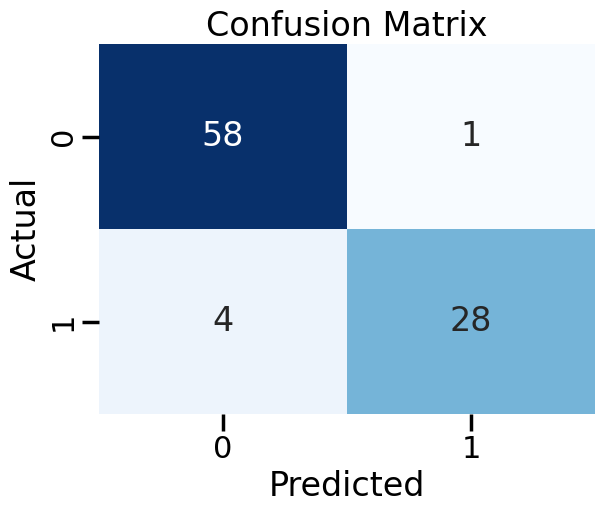

In [93]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test,y_pred_knn)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9451, Precision: 0.94,suggesting that 94% of the instances predicted as Class 0 are actually Class 0. 0.97,indicating that 97% of the instances predicted as Class 1 are indeed Class 1.

Recall: 0.98, indicating that the model correctly identifies 98% of the actual instances of Class 0. 0.88,suggesting that the model identifies 88% of the actual instances of Class 1.

F1-score: 0.96,which is the harmonic mean of precision and recall for Class 0. Class 1: 0.92,which is the harmonic mean of precision and recall for Class 1. AUC-ROC:0.987552966101695,indicating a high discriminatory ability.

confusion matrix: True Negatives (TN): 58,The number of True negatives (TN) that were accurately predicted as Class 0 was 58. False Positives (FP): 1, Examples that were incorrectly classified as Class 1 False Negatives (FN): 4,Instances incorrectly predicted as Class 0. True Positives (TP): 28,Instances rightly predicted as Class 1.

### 5.2.1.3 Support Vector Machines(SVM)

In [94]:
svm_classifier = SVC()
svm_classifier.fit(PCA_com_train,y_train)
y_pred_svm = svm_classifier.predict(PCA_com_test)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred_svm)
precision=precision_score(y_test,y_pred_svm)
recall=recall_score(y_test,y_pred_svm)
classification_report_result=classification_report(y_test,y_pred_svm)

print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")

print("Classification Report:\n",classification_report_result)

Accuracy:0.967032967032967
Precision:1.0
Recall:0.90625
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.91      0.95        32

    accuracy                           0.97        91
   macro avg       0.98      0.95      0.96        91
weighted avg       0.97      0.97      0.97        91



AUC-ROC:0.996292372881356


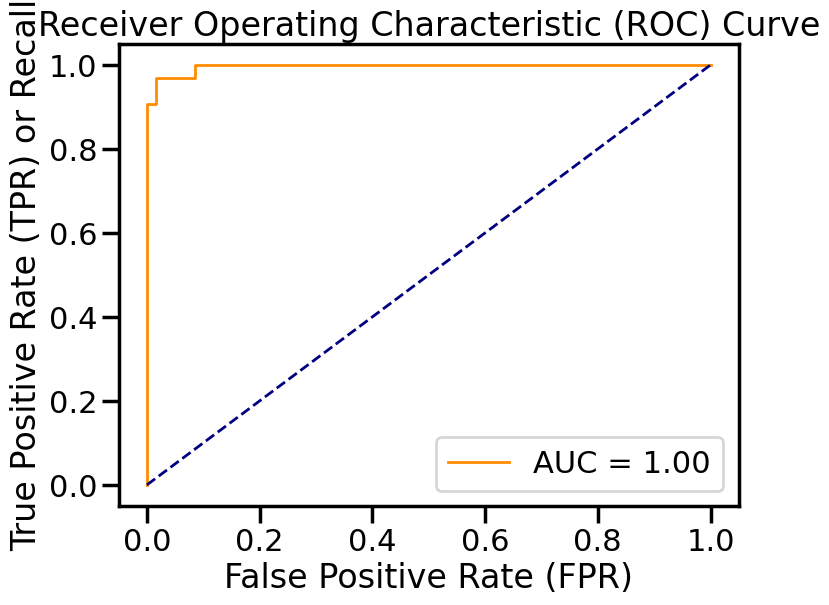

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve
svm_classifier=SVC(probability=True)
svm_classifier.fit(PCA_com_train, y_train)

y_prob=svm_classifier.predict_proba(PCA_com_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

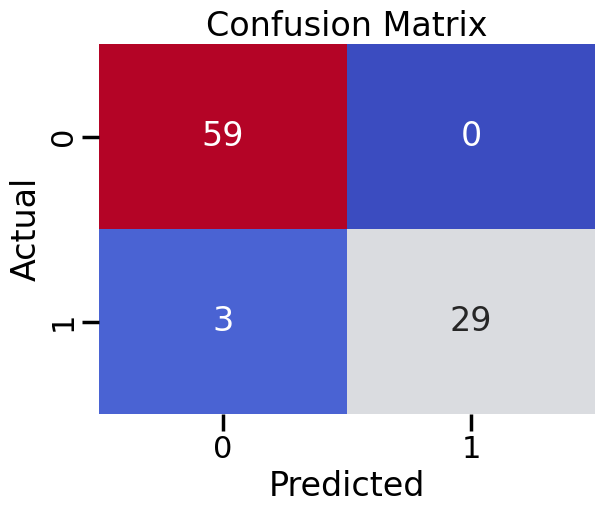

In [96]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test,y_pred_svm)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="coolwarm",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.9670,indicating that it correctly predicts the target variable in 96.70% of cases.

Precision: 0.95,suggesting that 95% of the instances predicted as Class 0 are actually Class 0. 1.00,indicating that all instances predicted as Class 1 are indeed Class 1.

Recall: 1.00,indicating that the model correctly identifies all actual instances of Class 0. 0.91,suggesting that the model identifies 91% of the actual instances of Class 1.

F1-score: 0.98,which is the harmonic mean of precision and recall for Class .0. 0.95, which is the harmonic mean of precision and recall for Class 1.

AUC-ROC:0.996292372881356,indicating an excellent discriminatory ability. This is a very high performance on the ROC curve.

confusion matrix: True Negatives (TN): 59,instances correctly predicted as Class 0. False Positives (FP): 0,mispredicted instances that belong to Class 1(M). False Negatives (FN): 3,instances wrongly predicted as Class 0. True Positives (TP): 29,the number of True positives (TP) that were accurately predicted as Class 0(B) was 29.

### 5.2.1.4 Random Forest

In [97]:
random_forest = RandomForestClassifier()
random_forest.fit(PCA_com_train,y_train)
y_pred_f = random_forest.predict(PCA_com_test)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred_f)
precision=precision_score(y_test,y_pred_f)
recall=recall_score(y_test,y_pred_f)
classification_report_result=classification_report(y_test,y_pred_f)

print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")

print("Classification Report:\n",classification_report_result)

Accuracy:0.9560439560439561
Precision:0.9666666666666667
Recall:0.90625
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.97      0.91      0.94        32

    accuracy                           0.96        91
   macro avg       0.96      0.94      0.95        91
weighted avg       0.96      0.96      0.96        91



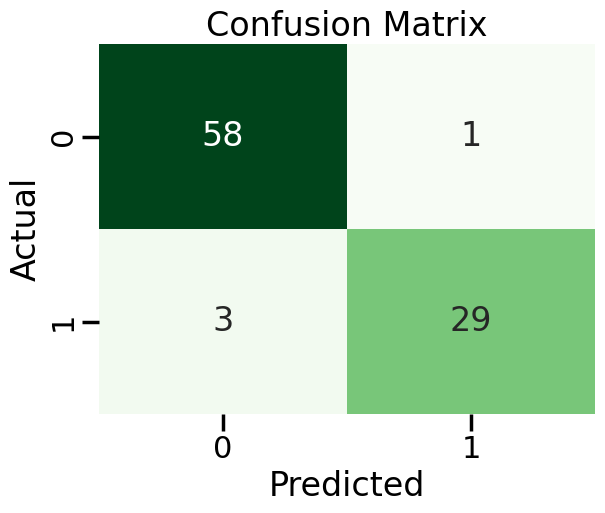

In [98]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test,y_pred_f)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="Greens",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC-ROC:0.9785487288135593


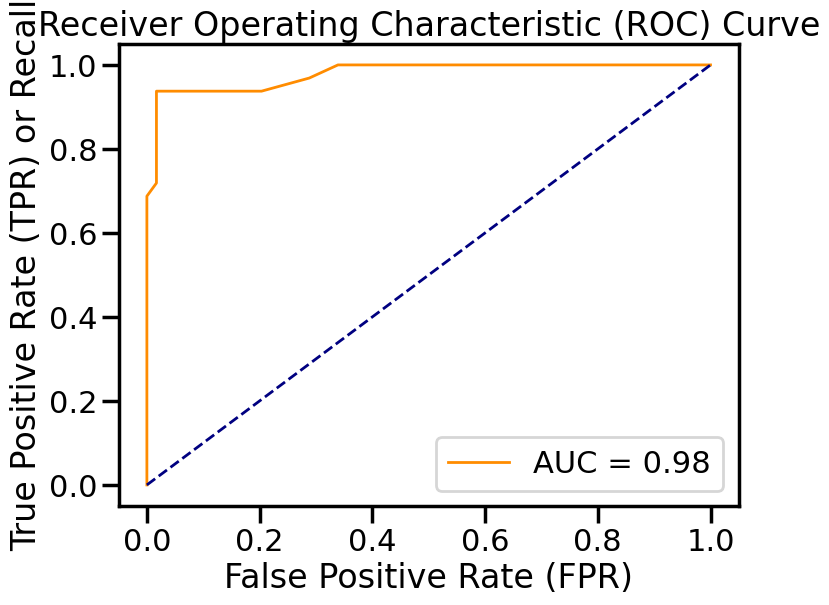

In [99]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob=random_forest.predict_proba(PCA_com_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9231,the model correctly predicted the class labels for approximately 92.31% of the instances.

Precision: 0.91,among the instances predicted as Class 0, 91% were actually Class 0. 0.96,among the instances predicted as Class 1, 96% were actually Class 1.

Recall: 0.98,Among all the actual instances of Class 0, the model correctly identified 98%. 0.81,Among all the actual instances of Class 1, the model correctly identified 81%.

F1-score: 0: 94% ,a balance between precision and recall for Class 0.88% , a balance between precision and recall for Class 1.

AUC-ROC:0.9846398305084746, the Area Under the Receiver Operating Characteristic curve is a measure of the model's ability to distinguish between the two classes. A value close to 1 indicates good performance.

confusion matrix: True Negatives (TN): 58,instances correctly predicted as Class 0. False Positives (FP): 1,instances predicted as Class 1 but actually Class 0. False Negatives (FN): 3,instances predicted as Class 0 but actually Class 1. True Positives (TP): 29,instances correctly predicted as Class 1.

### 5.2.1.5 Naive Bayes

In [100]:
naive_bayes = GaussianNB()
naive_bayes.fit(PCA_com_train,y_train)
y_pred_b = naive_bayes.predict(PCA_com_test)

#Evaluate the model
accuracy=accuracy_score(y_test,y_pred_b)
precision=precision_score(y_test,y_pred_b)
recall=recall_score(y_test,y_pred_b)
classification_report_result=classification_report(y_test,y_pred_b)

print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")

print("Classification Report:\n",classification_report_result)

Accuracy:0.8571428571428571
Precision:0.9130434782608695
Recall:0.65625
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        59
           1       0.91      0.66      0.76        32

    accuracy                           0.86        91
   macro avg       0.88      0.81      0.83        91
weighted avg       0.86      0.86      0.85        91



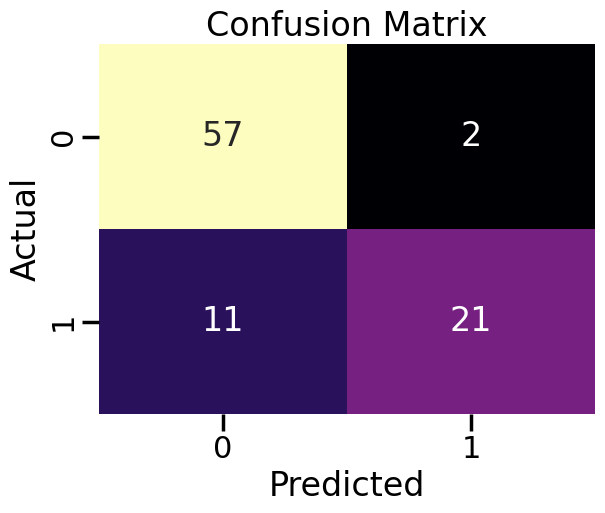

In [101]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test,y_pred_b)


sns.heatmap(con_matrix,annot=True,fmt="d",cmap="magma",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC-ROC:0.9465042372881356


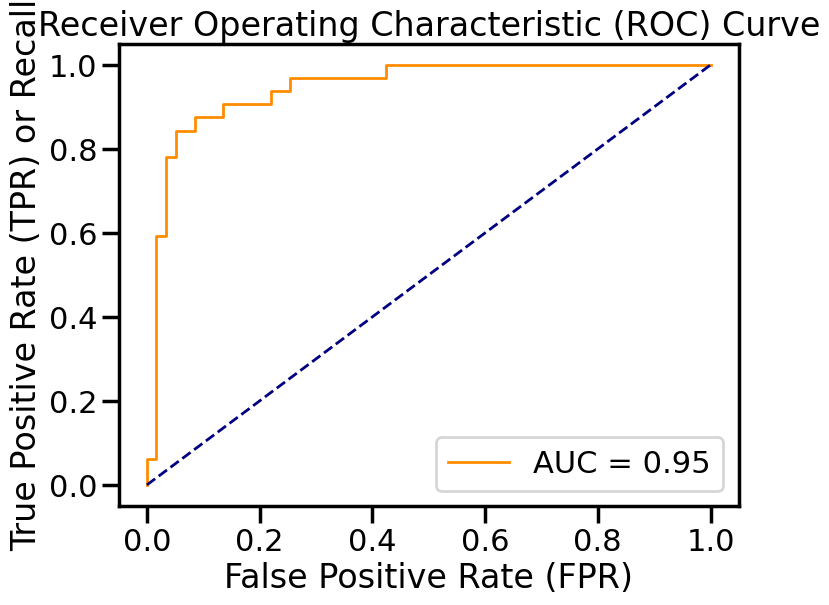

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob=naive_bayes.predict_proba(PCA_com_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.8571,the model correctly predicted the class labels for approximately 85.71% of the instances.

Precision: 0.84,Among the instances predicted as Class 0, 84% were actually Class 0. 0.91,Among the instances predicted as Class 1, 91% were actually Class 1.

Recall: Among all the actual instances of Class 0, the model correctly identified 97% and among all the actual instances of Class 1, the model correctly identified 66%.

F1-score: 0.90,a balance between precision and recall for Class 0. 0.76,a balance between precision and recall for Class 1.

AUC-ROC:0.9465042372881356,The Area Under the Receiver Operating Characteristic curve is a measure of the model's ability to distinguish between the two classes. A value close to 1 indicates good performance.

confusion matrix: True Negatives (TN): 57 - Instances correctly predicted as Class 0. False Positives (FP): 2 - Instances predicted as Class 1 but actually Class 0. False Negatives (FN): 11 - Instances predicted as Class 0 but actually Class 1. True Positives (TP): 21 - Instances correctly predicted as Class 1.

# 5.3. CONCLUSION OF CLASSIFICATION(USING PCA)

Based on this result,SVM obtained the highest accuracy,precision,recall,AUC-ROC and F1-score for both classes.These metrics collectively indicate that the SVM model is performing well in distinguishing between benign and malignant based on chosen mappings.Logistic Regression, K-Nearest Neighbors, and Random Forest also perform well and can be considered as alternative models.
Naive Bayes, while having lower overall accuracy, might still provide valuable information, especially for benign cases.

confusion matrix:SVM appears to be the most robust model.Logistic regression and KNN also perform well but have a slightly higher false negative rate.Random forest performance similar to SVM.Even while Naive bayes provide decent accuracy,might not be the ideal option where reducing false positives and false negatives in critical.


## 5.2.2 Classification using EDA 


In [103]:
# Scale features
scaler = StandardScaler()
features = scaler.fit_transform(features_df)

# Train/ Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target_arr, test_size=0.2, random_state=33, stratify=target_arr)

### 5.2.2.1  Binary Logistic Regression

In [104]:
#Logistic Regresion
log_regression=LogisticRegression()
log_regression.fit(X_train1,y_train1)
y_pred=log_regression.predict(X_test1)

#Evaluate the model
accuracy=accuracy_score(y_test1,y_pred)
precision=precision_score(y_test1,y_pred)
recall=recall_score(y_test1,y_pred)
classification_report_result=classification_report(y_test1,y_pred)

print(f"Accuracy:{accuracy}")
print("Classification Report:\n",classification_report_result)


Accuracy:0.945054945054945
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.97      0.88      0.92        32

    accuracy                           0.95        91
   macro avg       0.95      0.93      0.94        91
weighted avg       0.95      0.95      0.94        91



AUC-ROC:0.9936440677966101


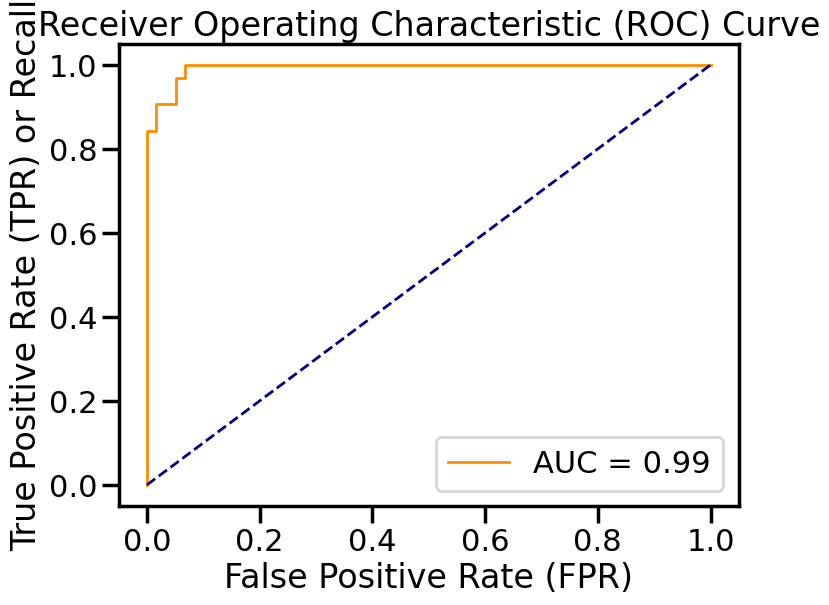

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob=log_regression.predict_proba(X_test1)[:,1]
roc_auc=roc_auc_score(y_test1,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test1, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

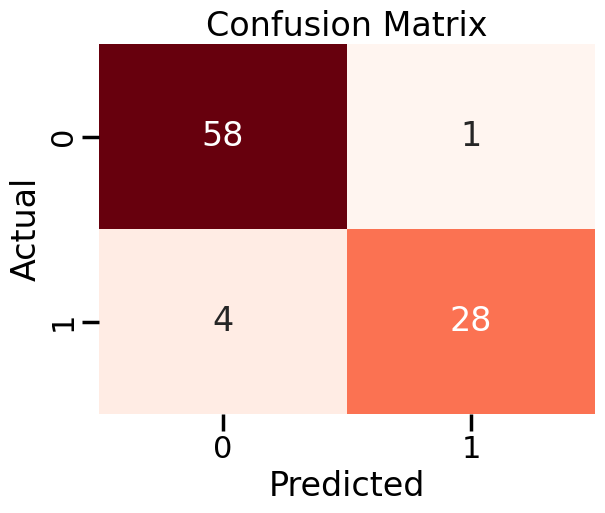

In [106]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test1,y_pred)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="Reds",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy:The model correctly predicted the class labels for approximately 94.51% of the instances.

Precision:Accuracy of the positive predictions is measured by precision. It is 94% for class 0 and 97% for class 1. Accordingly, 94% of the cases that were predicted to be class 0 actually are, and 97% of the instances that were predicted to be class 1 actually are.

Recall: Recall quantifies the model's capacity to record every instance of success. It is 98% for class 0 and 88% for class 1. According to this, only 88% of the actual class 1 instances are correctly predicted, compared to 98% of the actual class 0 instances.

F1-score: The F1-score is the harmonic mean of precision and recall. For class 0, it is 96%, and for class 1, it is 92%. It provides a balance between precision and recall.

AUC-ROC:0.9804025423728814,The Area Under the Receiver Operating Characteristic curve is a measure of the model's ability to distinguish between the two classes. A value close to 1 indicates good performance.An AUC-ROC score of 0.98 is quite high, indicating a strong discriminatory power of the model.

confusion matrix: True Negatives (TN): 58- Instances correctly predicted as Class 0. False Positives (FP): 1 - Instances predicted as Class 1 but actually Class 0. False Negatives (FN): 4 - Instances predicted as Class 0 but actually Class 1. True Positives (TP): 28 - Instances correctly predicted as Class 1.


### 5.2.2.2  K-Nearest Neighbors

In [107]:
X_test1 = np.ascontiguousarray(X_test1)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train1,y_train1)
y_pred_knn= knn_classifier.predict(X_test1)

#Evaluate the model
accuracy=accuracy_score(y_test1,y_pred_knn)
precision=precision_score(y_test1,y_pred_knn)
recall=recall_score(y_test1,y_pred_knn)
classification_report_result=classification_report(y_test1,y_pred_knn)

print(f"Accuracy:{accuracy}")
print("Classification Report:\n",classification_report_result)

Accuracy:0.9340659340659341
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.96      0.84      0.90        32

    accuracy                           0.93        91
   macro avg       0.94      0.91      0.93        91
weighted avg       0.94      0.93      0.93        91



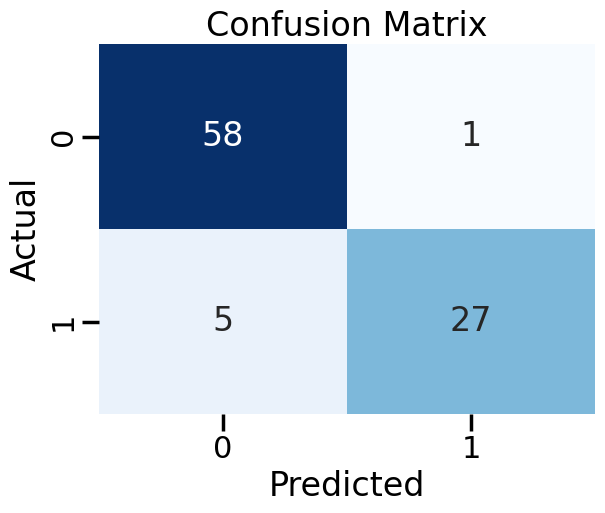

In [108]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test1,y_pred_knn)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC-ROC:0.9886122881355932


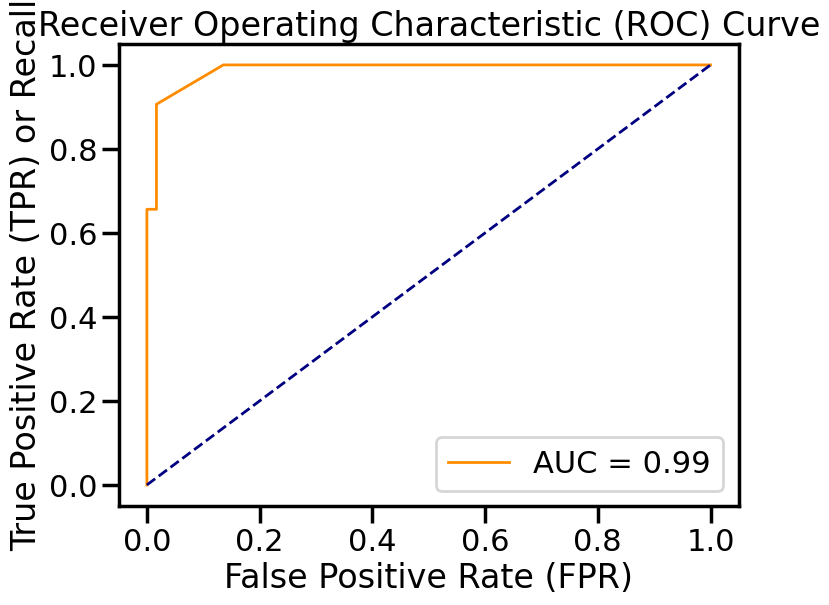

In [109]:
y_prob=knn_classifier.predict_proba(X_test1)[:,1]
roc_auc=roc_auc_score(y_test1,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test1, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: The overall accuracy of the KNN model is 93.41%, indicating that approximately 93.41% of the predictions are correct.

Precision: For class 0, precision is 92%, and for class 1, it is 96%. This means that 92% of instances predicted as class 0 are actually class 0, and 96% of instances predicted as class 1 are actually class 1.

Recall:Recall is 98% for class 0 and for class 1, it is 84%. This shows that 84% of actual class 1 instances are correctly predicted, compared to 98% of actual class 0 instances.

F1-score:The F1-score is 95% is for class 0, and it is 90% for class 1. The F1-score balances precision and recall.

AUC-ROC: An AUC-ROC score of 0.9886 is very high, indicating excellent discriminatory power.

Confusion Matrix:
True Negatives (TN): 58- Instances correctly predicted as Class 0. False Positives (FP): 1 - Instances predicted as Class 1 but actually Class 0. False Negatives (FN): 5 - Instances predicted as Class 0 but actually Class 1. True Positives (TP): 27 - Instances correctly predicted as Class 1.



### 5.2.2.3 Support Vector Machines(SVM)

In [110]:
svm_classifier = SVC()
svm_classifier.fit(X_train1,y_train1)
y_pred_svm = svm_classifier.predict(X_test1)

#Evaluate the model
accuracy=accuracy_score(y_test1,y_pred_svm)
precision=precision_score(y_test1,y_pred_svm)
recall=recall_score(y_test1,y_pred_svm)
classification_report_result=classification_report(y_test1,y_pred_svm)

print(f"Accuracy:{accuracy}")

print("Classification Report:\n",classification_report_result)

Accuracy:0.9560439560439561
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.97      0.91      0.94        32

    accuracy                           0.96        91
   macro avg       0.96      0.94      0.95        91
weighted avg       0.96      0.96      0.96        91



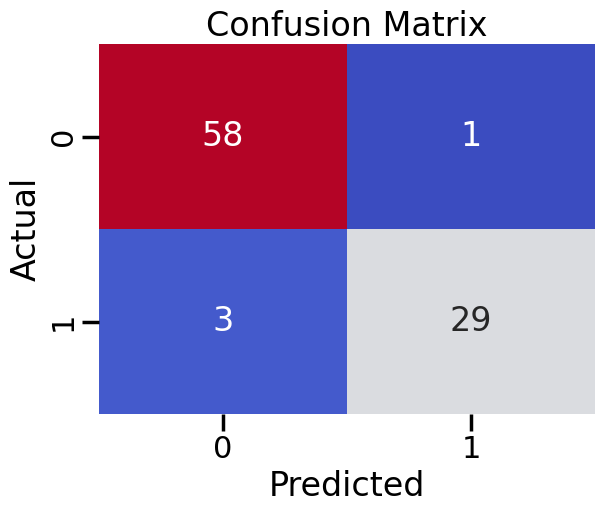

In [111]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test1,y_pred_svm)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="coolwarm",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC-ROC:0.996292372881356


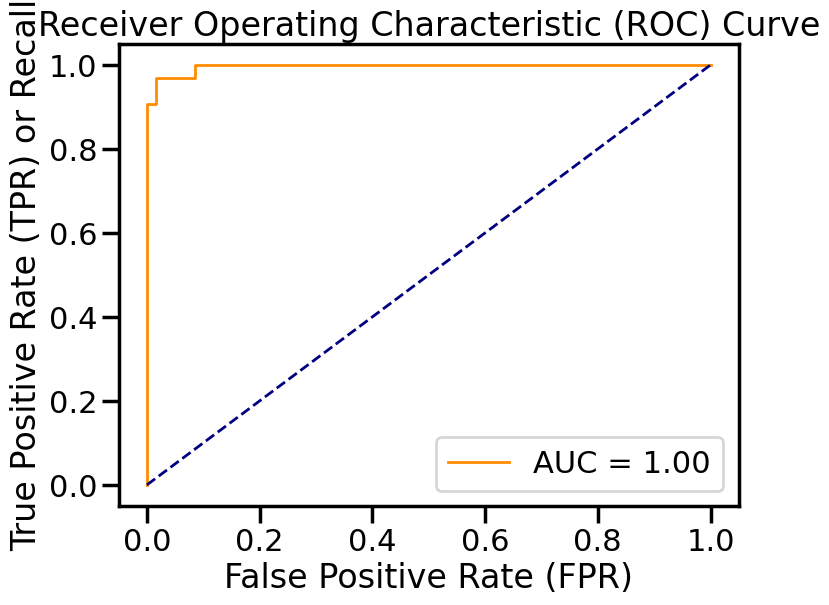

In [112]:
svm_classifier=SVC(probability=True)
svm_classifier.fit(X_train1, y_train1)

y_prob=svm_classifier.predict_proba(X_test1)[:,1]
roc_auc=roc_auc_score(y_test1,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test1, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: The overall accuracy of the SVM model is 95.60%, indicating that approximately 95.60% of the predictions are correct.

Precision:Precision is 95% is class 0 and it is 97% for class 1. This means that 95% of instances predicted as class 0 are actually class 0, and 97% of instances predicted as class 1 are actually class 1.

Recall: For class 0, Recall is 98% for class 0 and it is 91% for class 1.Essentially, this means that 98% of real class 0 instances and 91% of real class 1 instances are correctly predicted.

F1-score:The F1-score is 97%for class 0 and it is 94% for class 1. The F1-score balances precision and recall.

AUC-ROC:An AUC-ROC score of 0.9963 is very high, indicating excellent discriminatory power.

confusion matrix: 
True Negatives (TN): 58- Instances correctly predicted as Class 0. False Positives (FP): 1 - Instances predicted as Class 1 but actually Class 0. False Negatives (FN): 3- Instances predicted as Class 0 but actually Class 1. True Positives (TP): 29 - Instances correctly predicted as Class 1.



### 5.2.2.4 Random Forest


In [113]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train1,y_train1)
y_pred_f = random_forest.predict(X_test1)

#Evaluate the model
accuracy=accuracy_score(y_test1,y_pred_f)
precision=precision_score(y_test1,y_pred_f)
recall=recall_score(y_test1,y_pred_f)
classification_report_result=classification_report(y_test1,y_pred_f)

print(f"Accuracy:{accuracy}")
print("Classification Report:\n",classification_report_result)

Accuracy:0.9340659340659341
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        59
           1       1.00      0.81      0.90        32

    accuracy                           0.93        91
   macro avg       0.95      0.91      0.92        91
weighted avg       0.94      0.93      0.93        91



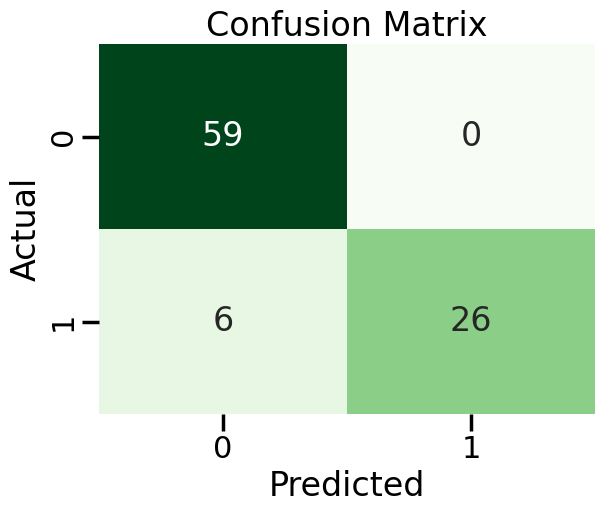

In [114]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test1,y_pred_f)

sns.heatmap(con_matrix,annot=True,fmt="d",cmap="Greens",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC-ROC:0.9626588983050847


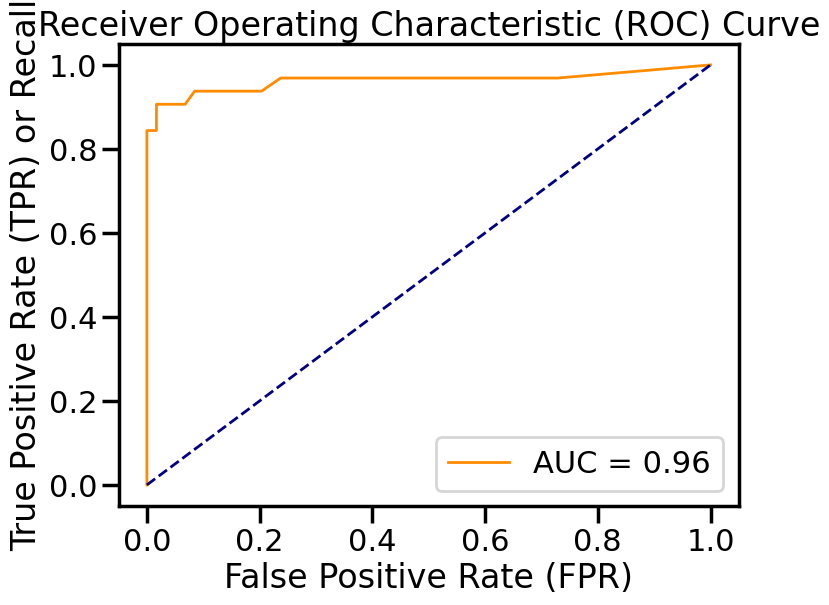

In [115]:
y_prob=random_forest.predict_proba(X_test1)[:,1]
roc_auc=roc_auc_score(y_test1,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test1, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: The overall accuracy of the random forest model is 92.30%, indicating that approximately 95.60% of the predictions are correct.

Precision:Precision is 91% for class 0 and it is 96% for class 1. This means that 91% of instances predicted as class 0 are actually class 0, and 96% of instances predicted as class 1 are actually class 1.

Recall:Recall is 98% for class 0 and for class 1, it is 81%.Essentially, this means that 98% of real class 0 instances and 81% of real class 1 instances are correctly predicted.

F1-score: The F1-score is 94% for class 0 and it is 88% for class 1. The F1-score balances precision and recall.

AUC-ROC: An AUC-ROC score of 0.96133 is very high, indicating excellent discriminatory power.

Confusion Matrix:
26 cases of class 1 were accurately predicted to be class 1 in the True Positive (TP) data.Class 0 instances were correctly predicted as class 0 in 58 cases of True Negative (TN).False Positives (FP): 1 - Instances predicted as Class 1 but actually Class 0. False Negatives (FN): 6- Instances predicted as Class 0 but actually Class 1. 

### 5.2.2.5 Naive Bayes

In [116]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train1,y_train1)
y_pred_b = naive_bayes.predict(X_test1)

#Evaluate the model
accuracy=accuracy_score(y_test1,y_pred_b)
precision=precision_score(y_test1,y_pred_b)
recall=recall_score(y_test1,y_pred_b)
classification_report_result=classification_report(y_test1,y_pred_b)

print(f"Accuracy:{accuracy}")
print("Classification Report:\n",classification_report_result)

Accuracy:0.9340659340659341
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.93      0.88      0.90        32

    accuracy                           0.93        91
   macro avg       0.93      0.92      0.93        91
weighted avg       0.93      0.93      0.93        91



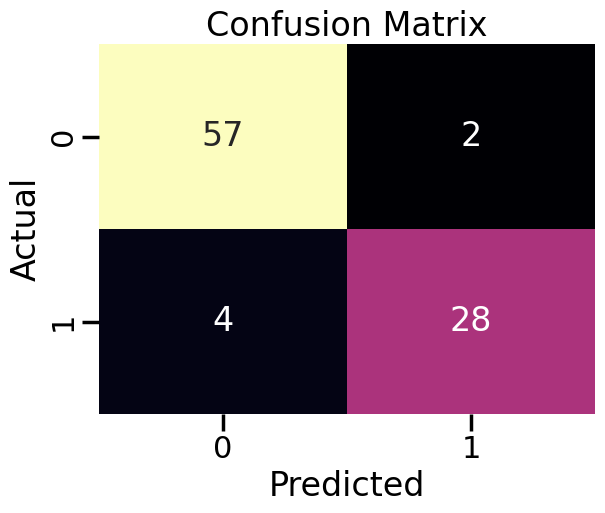

In [117]:
#visualizing the confusion matrix using heatmap
con_matrix=confusion_matrix(y_test1,y_pred_b)


sns.heatmap(con_matrix,annot=True,fmt="d",cmap="magma",cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC-ROC:0.965572033898305


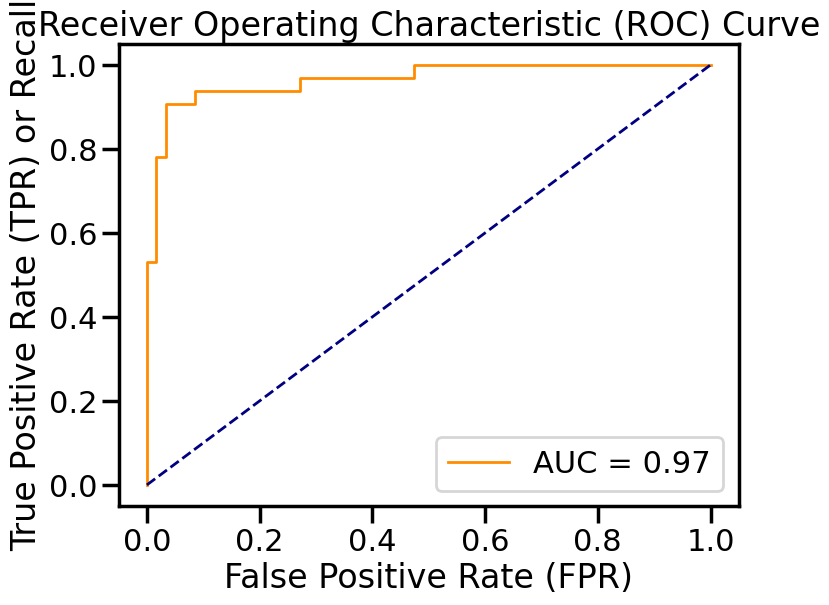

In [118]:
y_prob=naive_bayes.predict_proba(X_test1)[:,1]
roc_auc=roc_auc_score(y_test1,y_prob)
print(f"AUC-ROC:{roc_auc}")

# visualization
fpr, tpr, _ = roc_curve(y_test1, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: The overall accuracy of the Naive Bayes model is 93.41%, indicating that approximately 93.41% of the predictions are correct.

Precision:For class 1, precision comes in at 93%. Accordingly, 93% of cases that were predicted to be class 0 actually are class 0, and 93% of cases that were predicted to be class 1 actually are class 1.

Recall: Recall is 97% for class 0 and 88% for class 1. According to this, 88% of actual class 1 instances and 97% of actual class 0 instances are correctly predicted.

F1-score: For class 0, the F1-score is 95%, and for class 1, it is 90%. The F1-score balances precision and recall.

AUC-ROC: An AUC-ROC score of 0.9656 is high, indicating good discriminatory power.

Confusion Matrix:
True Positive (TP): Class 1 was correctly predicted as class 1 in 28 cases.
True Negative (TN): 57 class 0 occurrences that were accurately predicted to be class 0.
False Positives (FP): 2- Instances predicted as Class 1 but actually Class 0. False Negatives (FN): 4- Instances predicted as Class 0 but actually Class 1. 

# 5.4 CONCLUSION OF CLASSIFICATION(USING EDA)

The classification algorithms—K-Nearest Neighbors, Support Vector Machines, Random Forest, Naive Bayes, and Logistic Regression—all show excellent overall performance and high accuracy. The range of accuracy is roughly 93.41% to 95.60%.
All models have impressive AUC-ROC scores, ranging from 0.9656 to 0.9963. This suggests that the models have a high degree of discriminatory power in identifying cases that are benign or malignant.

Support Vector Machines (SVM) appears to have the highest accuracy (95.60%) and AUC-ROC (0.9963), making it a strong candidate for deployment.K-Nearest Neighbors (KNN) and Random Forest also perform well with high accuracy and AUC-ROC scores.Logistic Regression and Naive Bayes show slightly lower performance compared to the other models but are still effective.

## 5.5 Regression

##  5.5.1 Using unsupervised features(PCA)

### 5.5.1.1.Linear Regression 

In [119]:
# Assuming 'symmetry_mean' is the numerical feature to be predicted
pred_feature = 'symmetry_mean'

# Using linear regression
reg_model = LinearRegression()

# Find the column index corresponding to 'symmetry_mean'
feature_index = np.where(X_train.columns == pred_feature)[0]

# Extracting features for training
x_train = np.delete(PCA_com_train, feature_index, axis=1)

# Extracting features for testing
x_test = np.delete(PCA_com_test, feature_index, axis=1)

# Extracting the target variable for training
Y_train =PCA_com_train.iloc[:, feature_index[0]]
# Extracting the target variable for testing
Y_test = PCA_com_test.iloc[:, feature_index[0]]

# Fitting the model
reg_model.fit(x_train,Y_train)

# Making predictions
y_pred_reg = reg_model.predict(x_test)

# Evaluate regression model
mse = mean_squared_error(Y_test, y_pred_reg)
r2 = r2_score(Y_test, y_pred_reg)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.6088449097295532
R-squared: -0.0362857494724651


Assuming 'symmetry_mean' is the numerical feature to be predicted.Mean squared error is 0.6088449097295532 and R-squared is -0.0362857494724651.The model shows to be ineffective at explaining the variance in the data, as indicated by the negative R-squared.The linear regression model have comparatively high mean square error implies that the data may not fit it well.

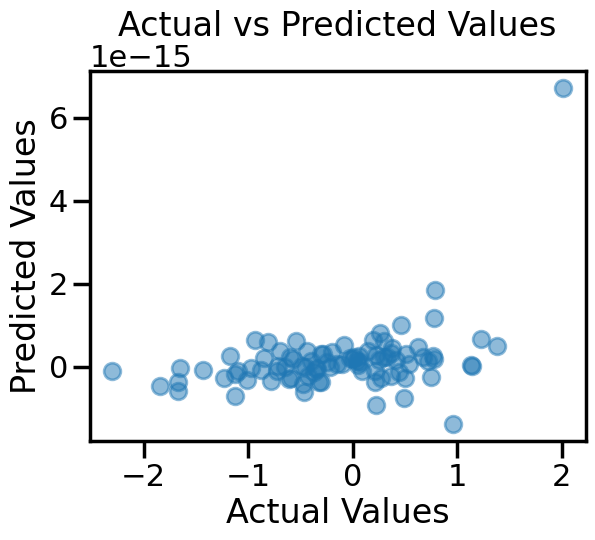

In [120]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred_reg,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

This plot is used  in regression analysis to visually assess how well the model predictions align with the true values.It shows that the data not fit it well. 

In [121]:
# Assuming 'radius_mean' is the target variable
target_variable = 'radius_mean'

# Using linear regression
reg_model = LinearRegression()

# Find the column index corresponding to ''symmetry_mean'
feature_index = np.where(X_train.columns == pred_feature)[0]

# Find the column indices corresponding to the features to keep
features_to_keep = ['radius_se','smoothness_mean','compactness_mean']
feature_indices = [X_train.columns.get_loc(feature) for feature in features_to_keep]

# Extracting features for training
x_train = PCA_com_train.iloc[:, feature_indices]
# Extracting features for testing
x_test = PCA_com_test.iloc[:, feature_indices]

# Extracting the target variable for training
Y_train =PCA_com_train.iloc[:, feature_index[0]]
# Extracting the target variable for testing
Y_test = PCA_com_test.iloc[:, feature_index[0]]


# Fitting the model
reg_model.fit(x_train, Y_train)

# Making predictions
y_pred_reg = reg_model.predict(x_test)

# Evaluate regression model
mse = mean_squared_error(Y_test, y_pred_reg)
r2 = r2_score(Y_test, y_pred_reg)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")


Mean squared error: 0.6088449097295535
R-squared: -0.036285749472465545


### 5.5.1.2.Support Vector regression

In [122]:
from sklearn.svm import SVR

# Assuming 'symmetry_mean' is the numerical feature to be predicted
pred_feature = 'symmetry_mean'

# Using linear regression
reg_model = SVR()

# Find the column index corresponding to 'symmetry_mean'
feature_index = np.where(X_train.columns == pred_feature)[0]

# Extracting features for training
x_train = np.delete(PCA_com_train, feature_index, axis=1)

# Extracting features for testing
x_test = np.delete(PCA_com_test, feature_index, axis=1)

# Extracting the target variable for training
Y_train =PCA_com_train.iloc[:, feature_index[0]]
# Extracting the target variable for testing
Y_test = PCA_com_test.iloc[:, feature_index[0]]

# Fitting the model
reg_model.fit(x_train,Y_train)

# Making predictions
y_pred_reg = reg_model.predict(x_test)

# Evaluate regression model
mse = mean_squared_error(Y_test, y_pred_reg)
r2 = r2_score(Y_test, y_pred_reg)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.08501992917465774
R-squared: 0.8552916520826428


Assuming 'symmetry_mean' is the numerical feature to be predicted.Mean squared error is 0.08501992917465774 and R-squared is 0.8552916520826428.The Support Vector Regression model performs better than linear regression with a significantly lower MSE and a high positive R-squared. This shows that SVR is a better model to use in order to forecast the'symmetry_mean' feature.


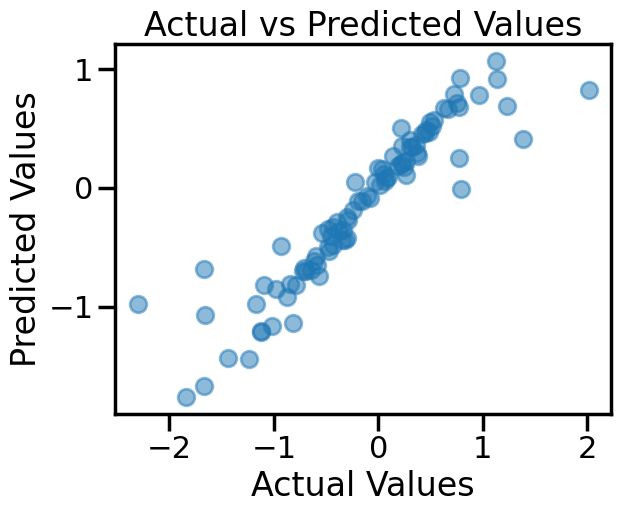

In [123]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred_reg,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

This plot is used  in regression analysis to visually assess how well the model predictions align with the true values.It shows that the data fit it well. 

### 5.5.1.3.Random Forest regression

In [124]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'symmetry_mean' is the numerical feature to be predicted
pred_feature = 'symmetry_mean'

# Using linear regression
reg_model = RandomForestRegressor()

# Find the column index corresponding to'symmetry_mean'
feature_index = np.where(X_train.columns == pred_feature)[0]

# Extracting features for training
x_train = np.delete(PCA_com_train, feature_index, axis=1)

# Extracting features for testing
x_test = np.delete(PCA_com_test, feature_index, axis=1)

# Extracting the target variable for training
Y_train =PCA_com_train.iloc[:, feature_index[0]]
# Extracting the target variable for testing
Y_test = PCA_com_test.iloc[:, feature_index[0]]

# Fitting the model
reg_model.fit(x_train,Y_train)

# Making predictions
y_pred_reg = reg_model.predict(x_test)

# Evaluate regression model
mse = mean_squared_error(Y_test, y_pred_reg)
r2 = r2_score(Y_test, y_pred_reg)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.10660059477816052
R-squared: 0.8185602351459809


Mean squared error is 0.1013567016855403 and R-squared value is  0.8274856143300711 .Random forest regression model performs also better with low MSE and a high positive R-squared.This shows that randomforest is a better model to use in order to forecast the'symmetry_mean' feature.

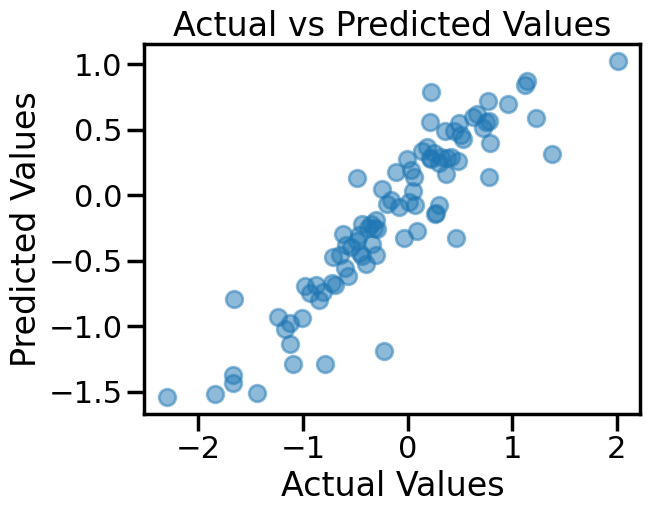

In [125]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred_reg,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

This plot is used in regression analysis to visually assess how well the model predictions align with the true values.It shows that the data fit it well.

### 5.5.1.4.Ridge regression

In [126]:
from sklearn.linear_model import Ridge

# Assuming 'symmetry_mean'is the numerical feature to be predicted
pred_feature = 'symmetry_mean'

# Using linear regression
reg_model = Ridge()

# Find the column index corresponding to ''symmetry_mean'
feature_index = np.where(X_train.columns == pred_feature)[0]

# Extracting features for training
x_train = np.delete(PCA_com_train, feature_index, axis=1)

# Extracting features for testing
x_test = np.delete(PCA_com_test, feature_index, axis=1)

# Extracting the target variable for training
Y_train =PCA_com_train.iloc[:, feature_index[0]]
# Extracting the target variable for testing
Y_test = PCA_com_test.iloc[:, feature_index[0]]

# Fitting the model
reg_model.fit(x_train,Y_train)

# Making predictions
y_pred_reg = reg_model.predict(x_test)

# Evaluate regression model
mse = mean_squared_error(Y_test, y_pred_reg)
r2 = r2_score(Y_test, y_pred_reg)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.6088449097295531
R-squared: -0.03628574947246488


Mean squared error is 0.6088449097295531 and R-squared is -0.03628574947246488 .The model shows to be ineffective at explaining the variance in the data, as indicated by the negative R-squared.The linear regression model have comparatively high mean square error implies that the data may not fit it well.This performs similarly to linear regression.

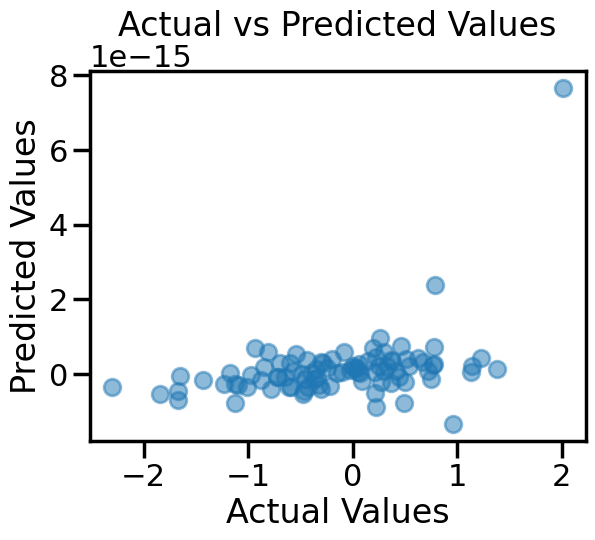

In [127]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred_reg,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

This plot is used in regression analysis to visually assess how well the model predictions align with the true values.It shows that the data not fit it well.

### 5.5.1.5.Lasso regression

In [128]:
from sklearn.linear_model import Lasso

# Assuming 'symmetry_mean'' is the numerical feature to be predicted
pred_feature = 'symmetry_mean'

# Using linear regression
reg_model = Lasso()

# Find the column index corresponding to 'symmetry_mean'
feature_index = np.where(X_train.columns == pred_feature)[0]

# Extracting features for training
x_train = np.delete(PCA_com_train, feature_index, axis=1)

# Extracting features for testing
x_test = np.delete(PCA_com_test, feature_index, axis=1)

# Extracting the target variable for training
Y_train =PCA_com_train.iloc[:, feature_index[0]]
# Extracting the target variable for testing
Y_test = PCA_com_test.iloc[:, feature_index[0]]

# Fitting the model
reg_model.fit(x_train,Y_train)

# Making predictions
y_pred_reg = reg_model.predict(x_test)

# Evaluate regression model
mse = mean_squared_error(Y_test, y_pred_reg)
r2 = r2_score(Y_test, y_pred_reg)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.6088449097295536
R-squared: -0.03628574947246577


Mean squared error is 0.6088449097295536 and  R-squared valu is a-0.03628574947246577.This performs similarly to linear regression and ridge regression.

## 5.2.2 Regression using EDA

### 5.2.2.1.Linear Regression

In [129]:
# Extract features and target variable
features_df = mthod1_df.drop(['diagnosis', 'symmetry_mean'], axis=1)
target = mthod1_df[ 'symmetry_mean']

# Scale features
scaler = StandardScaler()
features = scaler.fit_transform(features_df)

# Train/ Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.2, random_state=33)

In [130]:

# Using linear regression
reg_model = LinearRegression()
reg_model.fit(X_train1, y_train1)
y_pred = reg_model.predict(X_test1)


# Evaluate regression model
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.037731701207338895
R-squared: 0.07813716323068909


Mean squared error is a 0.037731701207338895 and R-squared is 0.07813716323068909.The linear regression model has a low mean squared error . The R-squared value is low, suggesting that the model might not capture.

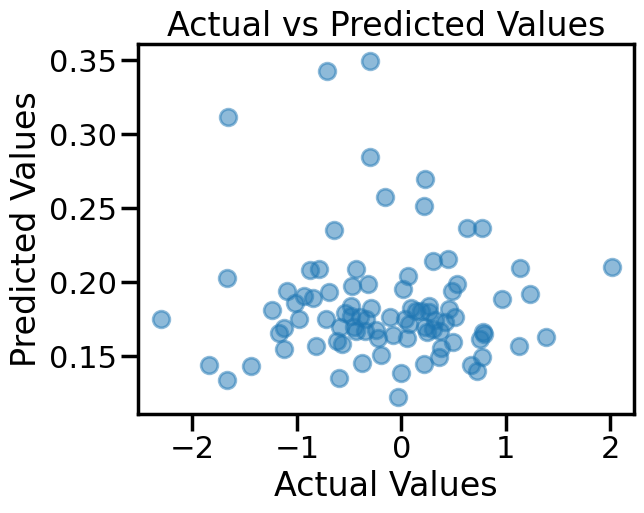

In [131]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 5.2.2.2.Support Vector regression

In [132]:
# Using SVR regression
reg_model = SVR()

reg_model.fit(X_train1, y_train1)
y_pred = reg_model.predict(X_test1)

# Evaluate regression model
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.035094147286272324
R-squared: 0.14257801434538853


Mean squared error is a 0.035094147286272324 and R-squared is 0.14257801434538853.The SVR regression model has a low mean squared error compared to the linear regression and R-squared value is low, suggesting that the model might not capture.

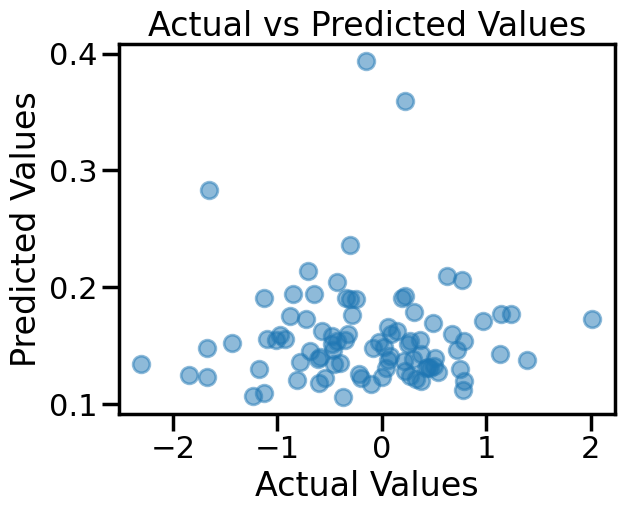

In [133]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 5.2.2.3.Random Forest regression

In [134]:
# Using random forest regression
reg_model = RandomForestRegressor()
reg_model.fit(X_train1, y_train1)
y_pred = reg_model.predict(X_test1)

# Evaluate regression model
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.04150454044449452
R-squared: -0.014041036281883024


Mean squared error is0.04262538918195604 and R-squared is -0.04142566945884174 .The model shows to be ineffective at explaining the variance in the data, as indicated by the negative R-squared.Model have comparatively low mean square error implies that the data may not fit.


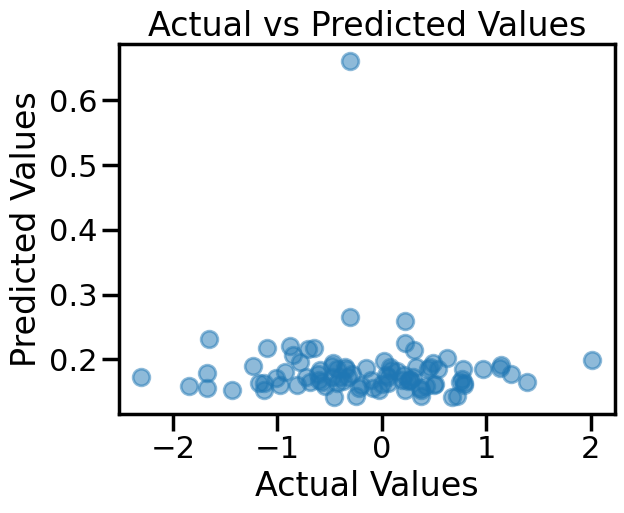

In [135]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 5.2.2.4.Ridge regression

In [136]:
# Using ridge regression
reg_model = Ridge()
reg_model.fit(X_train1, y_train1)
y_pred = reg_model.predict(X_test1)

# Evaluate regression model
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.03774329448582637
R-squared: 0.07785391566294253


Mean squared error is a 0.03774329448582637 R-squared valyu is a 0.0862357676204315.The ridge regression model produced results similar to the linear regression.

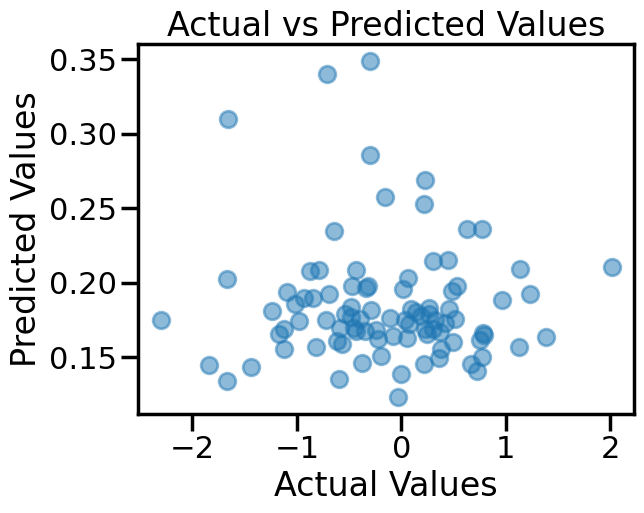

In [137]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 5.2.2.5.Lasso regression

In [138]:

# Using Lasso regression
reg_model = Lasso()
reg_model.fit(X_train1, y_train1)
y_pred = reg_model.predict(X_test1)

# Evaluate regression model
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.04102839768396138
R-squared: -0.0024078922176848927


Mean squared error is  0.04102839768396138 and R-squared value is a -0.0024078922176848927.The lasso regression model has a low mean squared error. However, the negative R-squared value suggests that this model may not be well-suited for the given data.

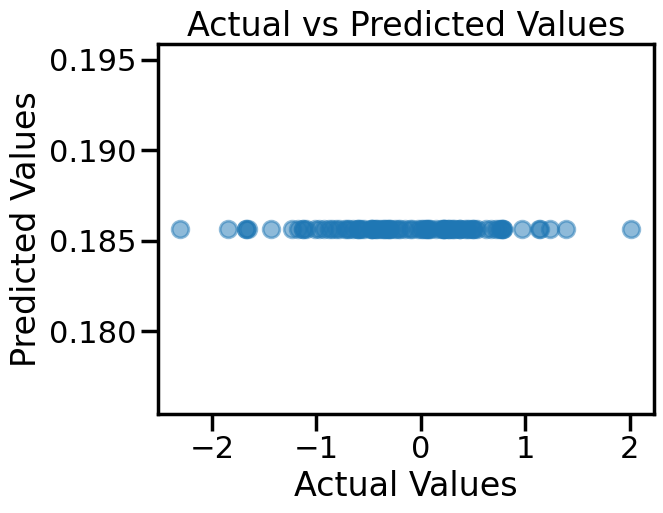

In [139]:
# scatter plot for actual vs predicted values
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 5.5 CONCLUSION OF  REGRESSION

##### Using PCA  features
The Support Vector Regression and Random Forest Regression seem to be the most promising models for predicting the 'symmetry_mean' feature, as they have lower MSE values and higher R-squared values compared to linear, ridge, and lasso regression.

##### Using EDA  features
The R-squared values of all the models are rather low.The ability of the model to explain the variance is not significantly affected by the model selection.

Therefor,PCA features are more suitable than EDA features for target variable 'symmetry_mean'.




# 6.0 OVERALL CONCLUSION

The breast cancer dataset underwent meticulous preprocessing, addressing missing values, negative entries, and outliers.Dropping the 'ID' column and judicious handling of missing values underscored the importance of real-world considerations.Exploratory Data Analysis (EDA) uncovered feature correlations, guiding dimensionality reduction using PCA.  Clustering analysis before and after dimensionality reduction using PCA and t-SNE revealed well-defined clusters, influencing feature set selection. Support Vector Machines excelled in classifying benign and malignant cases, with alternative models showing robust performance. For predicting 'symmetry_mean,' Support Vector Regression and Random Forest outperformed linear models. Insights emphasized the effectiveness of PCA features over EDA for regression. The comprehensive analysis provides valuable understanding, contributing to medical diagnostics, and suggests avenues for continued model refinement and enhancement in breast cancer prediction.